In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
from __future__ import print_function
!pip install keract
!pip install utils
import os
from glob import glob

import keras
import keract
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.datasets import mnist


class MNIST:
    # input image dimensions
    img_rows, img_cols = 28, 28
    input_shape = (img_rows, img_cols, 1)
    num_classes = 10


    def get_mnist_data():
   
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        x_train = x_train.reshape(x_train.shape[0], MNIST.img_rows, MNIST.img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], MNIST.img_rows, MNIST.img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255
        print('x_train shape:', x_train.shape)
        print(x_train.shape[0], 'train samples')
        print(x_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, MNIST.num_classes)
        y_test = keras.utils.to_categorical(y_test, MNIST.num_classes)
        return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = MNIST.get_mnist_data()
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                         activation='relu',
                         input_shape=MNIST.input_shape))
        
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(MNIST.num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=64,
          validation_split=0.20,
          epochs=15,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.3216 - accuracy: 0.9003 - val_loss: 0.0624 - val_accuracy: 0.9815
Epoch 2/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1430 - accuracy: 0.9574 - val_loss: 0.0528 - val_accuracy: 0.9829
Epoch 3/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1189 - accuracy: 0.9641 - val_loss: 0.0435 - val_accuracy: 0.9861
Epoch 4/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1044 - accuracy: 0.9688 - val_loss: 0.0444 - val_accuracy: 0.9865
Epoch 5/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0974 - accuracy: 0.9701 - val_loss: 0.0399 - val_accuracy: 0.9874
Epoch 6/15
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0913 - accuracy: 0.9719 - val_loss: 0.0377 - val_accura

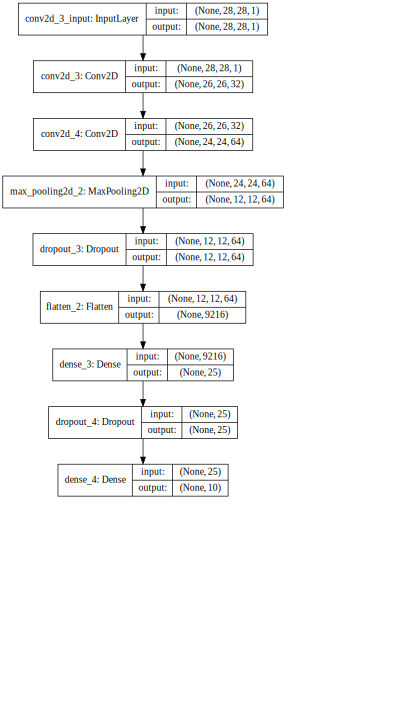

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB',dpi=50).create(prog='dot', format='svg'))

In [5]:
image_index=1

import numpy as np

test_image =np.expand_dims(x_test[image_index], axis=0)
test_image.shape

model.predict_proba(test_image,batch_size=1)



array([[1.1788254e-11, 1.0511092e-09, 1.0000000e+00, 3.8419974e-09,
        2.6358811e-11, 8.8539015e-16, 5.3391513e-10, 4.4695789e-10,
        4.9765220e-10, 3.4633117e-12]], dtype=float32)

In [0]:
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  
    #print("the outputs of the layer is {}".format(outputs))
    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [0]:
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
    import openpyxl
    from openpyxl import Workbook,load_workbook

 
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
            #print("The activations for the layer is {}".format(activations))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            if i==6:
              path='/gdrive//My Drive//results_MNIST_images_25.xlsx'
              wb = load_workbook(path)
              wb.get_sheet_names()
              ws=wb.active
              row=0
              column=0
              max = ws.max_row
              maxc =ws.max_column
              for row, entry in enumerate(activations,start=1):
                ws.cell(row=row+max, column=column+maxc, value=entry)
              
              wb.save(path)
            print("The activations for the layer is {}".format(activations))
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        

        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(activations, interpolation='None', cmap='binary')
        plt.show()       

In [0]:
def img_samenum(x_test,y_test,number):

  """
  retrieve images of same digit and reshape
  """

  x_test_2=[x_test[y_test==number]]

  x_test_2array=np.array(x_test_2[0],dtype='float')
  print(x_test_2array.shape)

  x_test_img=x_test_2array.reshape(x_test_2array.shape[0],28,28,1)
  print(x_test_img.shape)
  return x_test_img


In [0]:
import numpy as np
def test_image(test_input,image_index):
  """
  pass the image to predict the probilities and get the final shape
  """

  image =np.expand_dims(test_input[image_index], axis=0)
  #print(test_image.shape)

  print(model.predict_proba(image,batch_size=1))
  print(image.shape)
  activations_0=get_activations(model,image)
  display_activations(activations_0)

In [13]:
#loading fresh test dataset from MNIST

(x_train_filter, y_train_filter), (x_test_filter, y_test_filter) = mnist.load_data()

x_test_filter.shape[0]

10000

In [134]:
#retrieveing images for num 0

x_test_img=img_samenum(x_test_filter,y_test_filter,0)

(980, 28, 28)
(980, 28, 28, 1)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


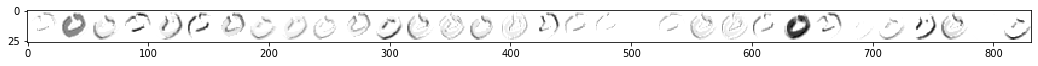

Displaying activation map 1


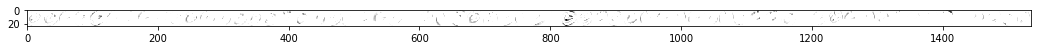

Displaying activation map 2


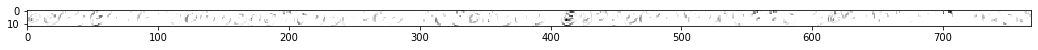

Displaying activation map 3


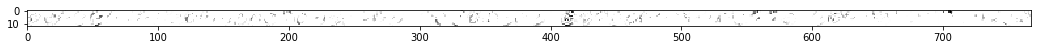

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


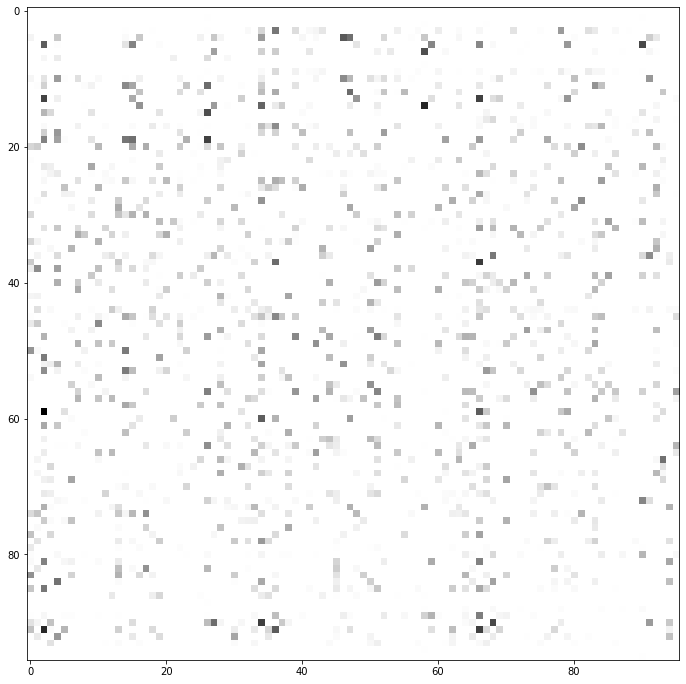

Displaying activation map 5
The activations for the layer is [ 796.72943 1405.1315  1425.9076  4193.9175  4611.639   4003.9734
 1626.1632  1141.7522   764.13556 3892.0505  1587.6046   926.90894
 3903.3896   749.53754 4138.6533  4061.833    377.9892  1871.9739
 4302.5083  2317.0186  2186.4412   340.3239  2412.1873  2267.5742
 3461.536  ]


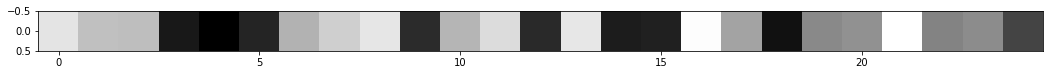

Displaying activation map 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


The activations for the layer is [1076.1327  2232.0945  2026.2429  6520.711   6915.402   6032.52
 2083.71    1468.6388     0.         0.      2159.7014  1375.0072
 6139.055      0.      6256.333   5952.509    189.54823 2643.8376
 6379.238   3236.173   3150.869    574.636   3470.6296     0.
 5197.2085 ]


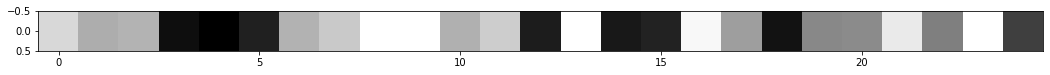

Displaying activation map 7
The activations for the layer is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


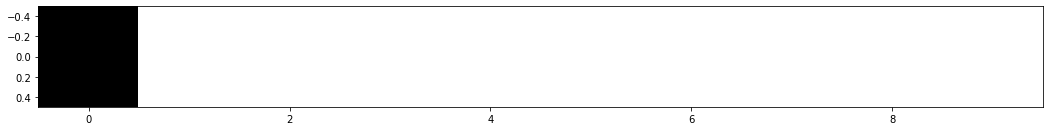

In [145]:
#first image of 0

test_image(x_test_img,3)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


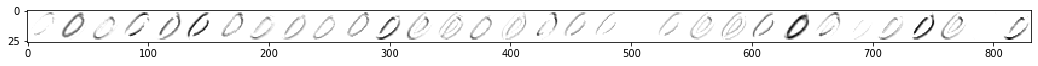

Displaying activation map 1


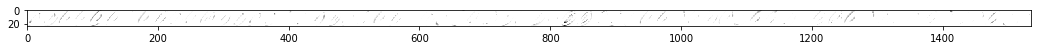

Displaying activation map 2


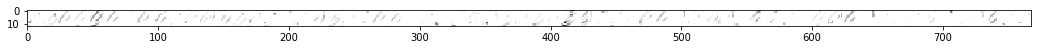

Displaying activation map 3


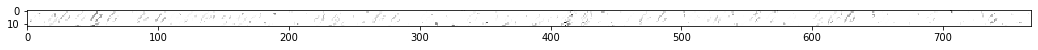

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


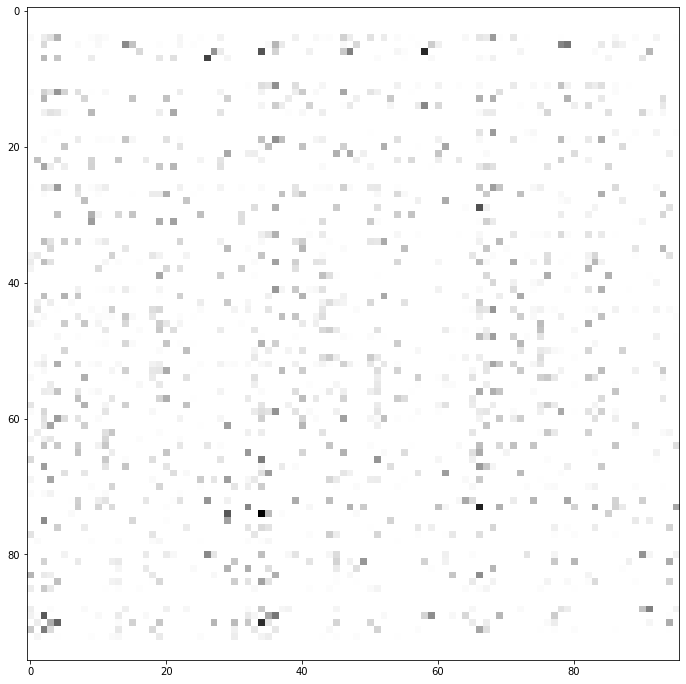

Displaying activation map 5
The activations for the layer is [1549.2396 1522.3684 2546.0813 4595.948  4982.475  3451.1267 1381.7305
 1553.3385 1004.224  4156.267  2531.1658 1056.1946 4152.767  1750.443
 3627.6218 3943.8542 1352.4465 2514.0547 4148.222  1492.0559 2431.298
    0.     1855.3499 1650.9296 3488.9746]


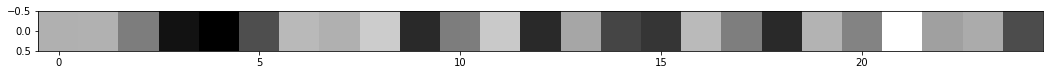

Displaying activation map 6
The activations for the layer is [   0.     2667.12   3388.4082 6709.0913    0.        0.        0.
    0.     1892.2133 6241.0757 3633.9834    0.     5830.362  2494.3218
 5406.342  5560.423     0.        0.     6024.172     0.     3528.1167
  192.9025 2743.2344 2650.1484 5068.44  ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


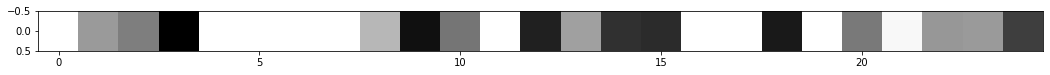

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


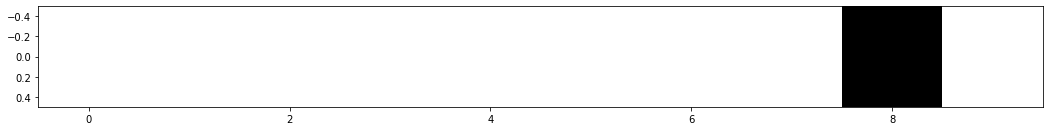

In [146]:
#second image of zero

test_image(x_test_img,15)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


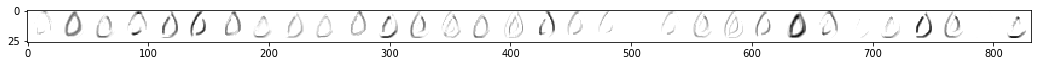

Displaying activation map 1


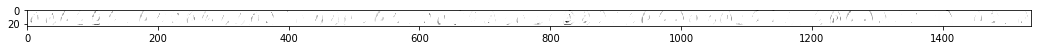

Displaying activation map 2


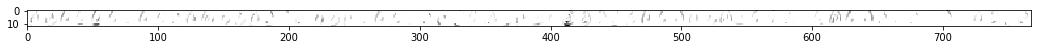

Displaying activation map 3


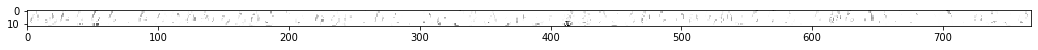

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


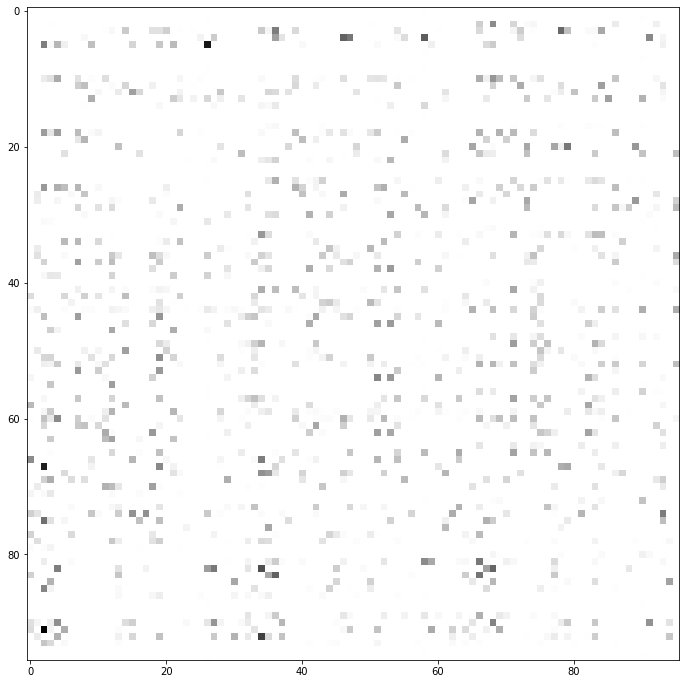

Displaying activation map 5
The activations for the layer is [1775.0502  2050.9978  2450.7908  4616.0273  4985.283   3500.6375
 1953.6777  1789.6749   806.96704 4237.9966  2871.4656   690.9467
 3536.8635  1322.6743  4100.617   3703.7612  1543.6252  2458.3606
 4468.259   2219.3186  2219.4316   380.7902  2366.7166  2173.4033
 3321.873  ]


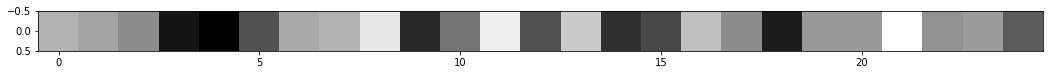

Displaying activation map 6
The activations for the layer is [2774.456     0.        0.     7005.5356 7849.8564 5591.805  2823.8499
 2956.4497 1147.3052 6618.4023 4187.6606  872.596  5670.47   2124.1123
 5985.703  5352.6284 2379.8027 3790.8962 7044.75   3186.0544    0.
  667.5714 3445.89      0.     5398.406 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


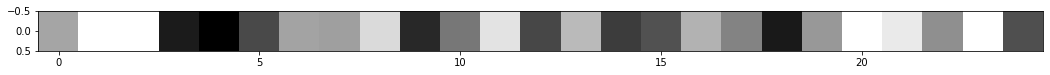

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


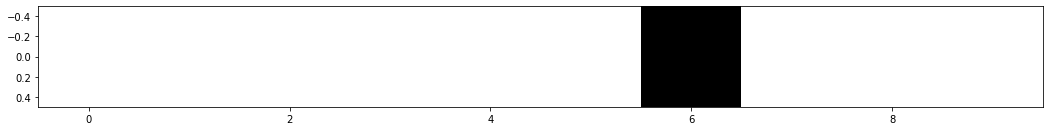

In [147]:
#third image of 0

test_image(x_test_img,555)

In [148]:
#retrieveing images for num 1

x_test_img_1=img_samenum(x_test_filter,y_test_filter,1)

(1135, 28, 28)
(1135, 28, 28, 1)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


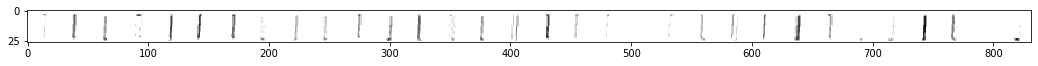

Displaying activation map 1


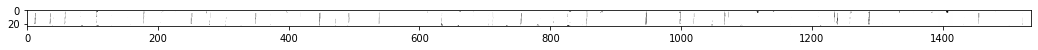

Displaying activation map 2


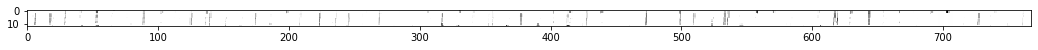

Displaying activation map 3


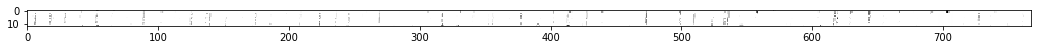

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


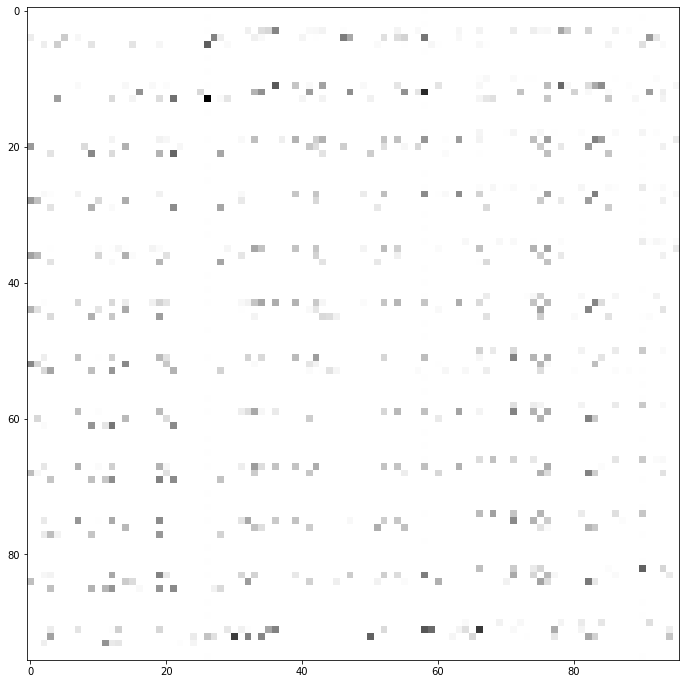

Displaying activation map 5
The activations for the layer is [3195.4736  1959.9474  3817.5662   445.93637  553.19696 3564.1394
 1836.9104  3621.826   2989.2964  1656.282   1469.5868  3546.609
 1875.6312  1527.8245  1219.4226  2129.3596  3293.7615  2954.9934
 3572.6646  1921.2323  2576.852    954.19946 2064.0244  4100.3276
 1924.293  ]


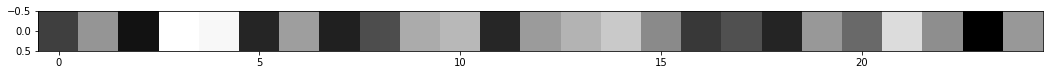

Displaying activation map 6
The activations for the layer is [4905.469     0.        0.      876.2919  869.5703 5815.293  2893.1526
 5794.614  4707.032     0.        0.     5444.068  2688.3079    0.
 1901.311     0.     5410.6685 5151.689     0.     3244.1475    0.
 1591.9436 3295.765     0.        0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


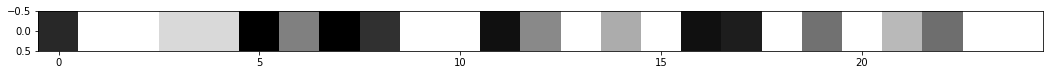

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


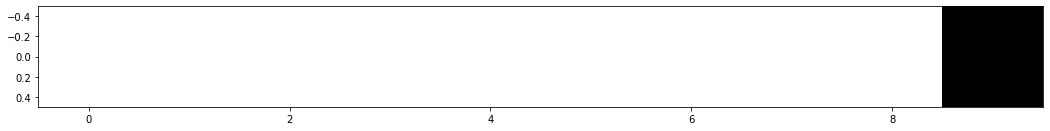

In [149]:
#first image of 1

test_image(x_test_img_1,23)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


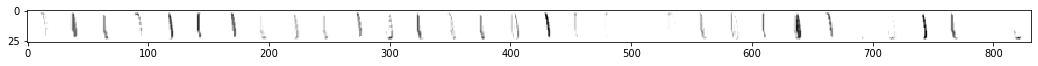

Displaying activation map 1


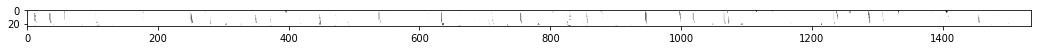

Displaying activation map 2


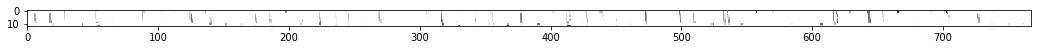

Displaying activation map 3


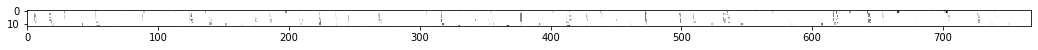

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


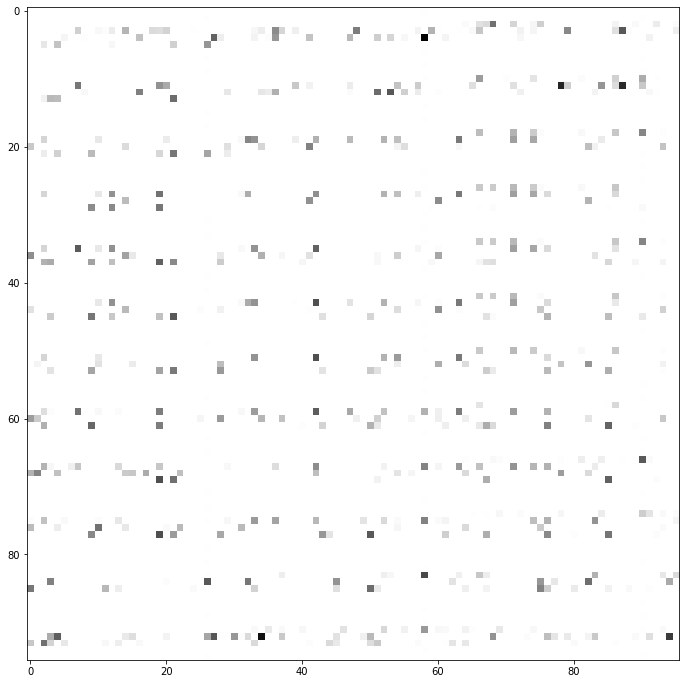

Displaying activation map 5
The activations for the layer is [2412.899   1910.3497  4013.563    649.1462   563.71796 3186.7427
 1747.6705  3283.212   2519.4346  1096.9142  1296.7234  3011.1006
 1393.0659  1727.2568  1532.8718  1829.6929  2811.0886  2925.1426
 3468.0073  2004.7383  2290.2751  1093.5049  2416.155   3919.5051
 1650.6068 ]


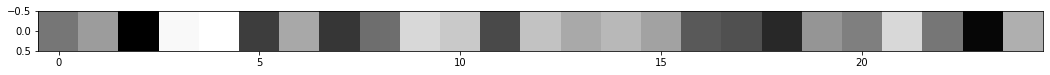

Displaying activation map 6
The activations for the layer is [3953.6047    0.     6380.7407    0.     1071.0327 5620.9404    0.
    0.        0.        0.     2173.6174 4551.8667    0.     3102.5437
    0.     2419.1775 4873.1924 4836.212     0.     3363.7317    0.
    0.        0.     6799.2075 2963.4048]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


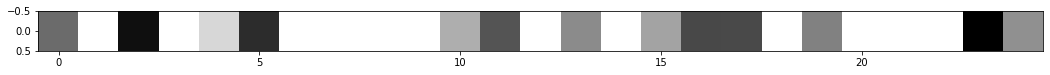

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


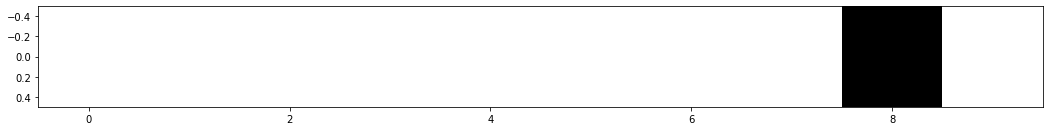

In [150]:
#second image of 1

test_image(x_test_img_1,456)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


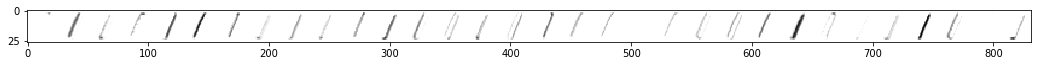

Displaying activation map 1


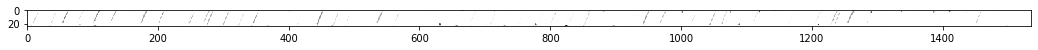

Displaying activation map 2


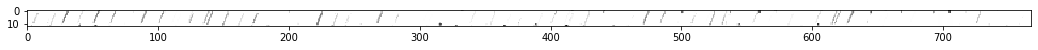

Displaying activation map 3


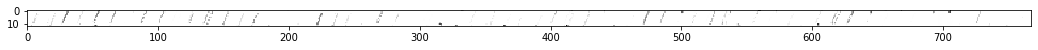

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


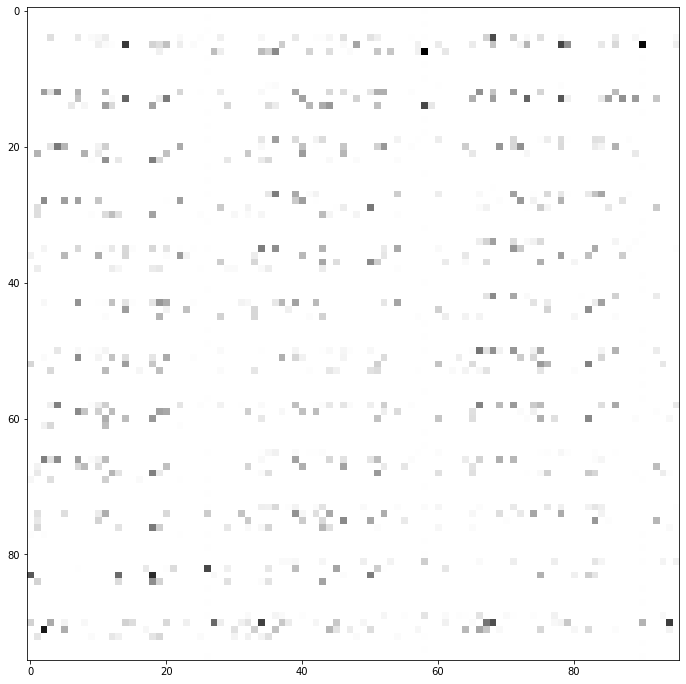

Displaying activation map 5
The activations for the layer is [2991.0908  1818.6011  3720.9905  1727.9567  1654.2739  3684.9563
 2035.8298  3653.345   2862.644   1309.3821  1895.0322  3219.2083
 1357.4805  1020.34515 1500.6737  1774.4863  3097.4238  3715.5767
 4237.556   1948.6299  2131.4207   674.5739  2482.6262  4364.846
 1445.8011 ]


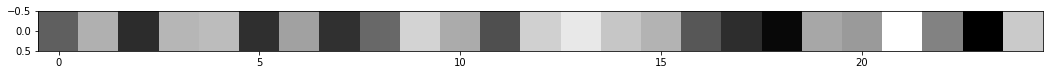

Displaying activation map 6
The activations for the layer is [4446.8354 2583.15   5635.7505 2753.9692 2585.7986    0.        0.
    0.     3989.389     0.        0.     4720.865  1974.9275 1467.245
 2555.09      0.     4676.048  5738.289  6397.6836    0.        0.
 1064.811  3939.7417 6681.5527    0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


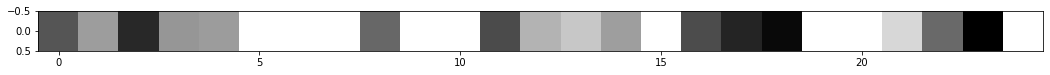

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


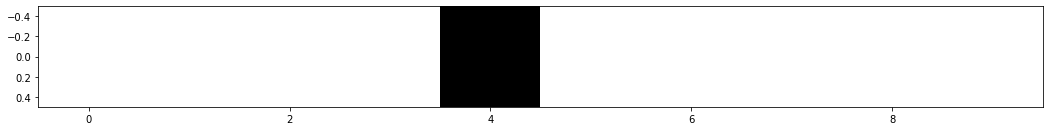

In [151]:
#third image of 1

test_image(x_test_img_1,1100)

In [152]:
#retrieveing images for num 2

x_test_img_2=img_samenum(x_test_filter,y_test_filter,2)

(1032, 28, 28)
(1032, 28, 28, 1)


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


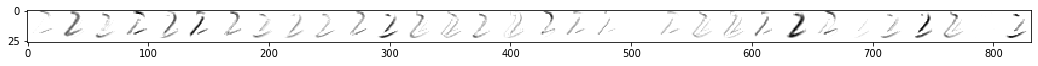

Displaying activation map 1


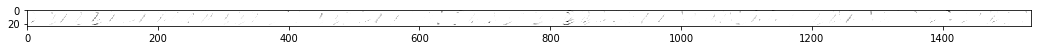

Displaying activation map 2


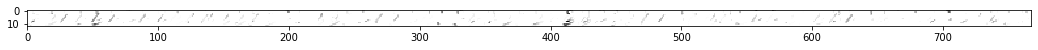

Displaying activation map 3


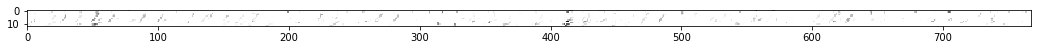

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


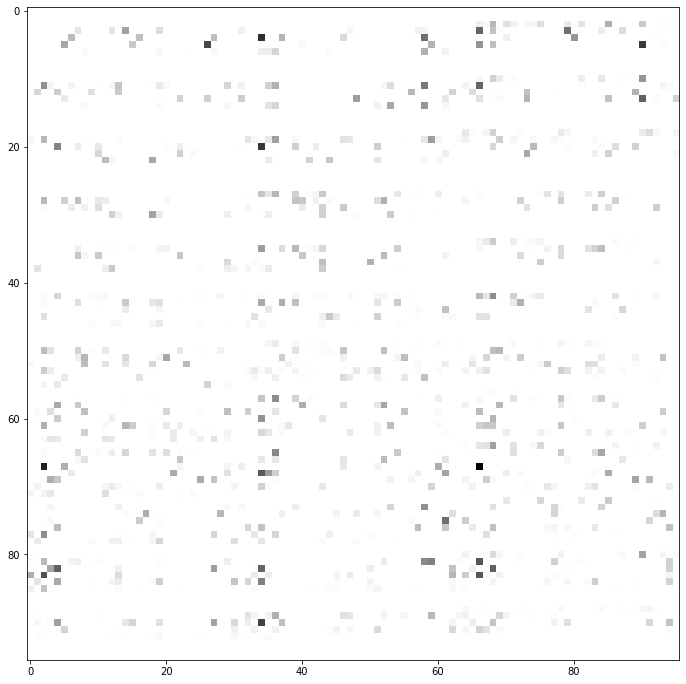

Displaying activation map 5
The activations for the layer is [2821.3452   212.71425 4559.5195  3042.1846  3254.564   1567.7185
  624.9701  2911.5005   946.923    739.2219  3389.0894   697.1584
 3125.2002  1631.9492  1594.0593  2041.2229  2305.8638  4171.6143
 2769.808   1761.055   2932.6992  1477.9884  1809.8024  2315.2656
 1763.5433 ]


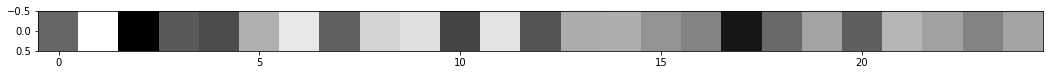

Displaying activation map 6
The activations for the layer is [   0.       434.7819     0.      4642.0146     0.      2202.1116
  674.76685    0.         0.       928.752   5146.414    908.21674
 4267.4834  2569.0256  2258.0513     0.         0.         0.
    0.      3054.393      0.      2407.6885  2363.7397  3090.864
 2466.7278 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


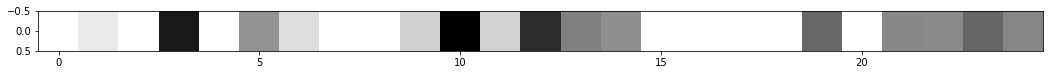

Displaying activation map 7
The activations for the layer is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


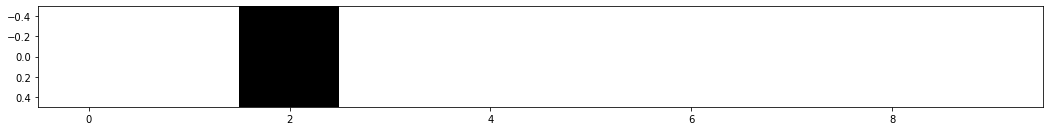

In [153]:
#test image for 2

test_image(x_test_img_2,334)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


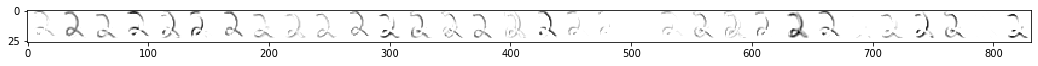

Displaying activation map 1


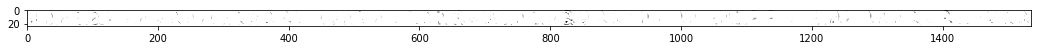

Displaying activation map 2


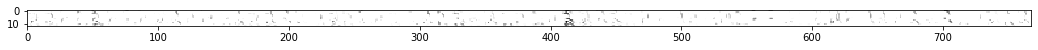

Displaying activation map 3


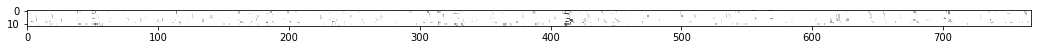

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


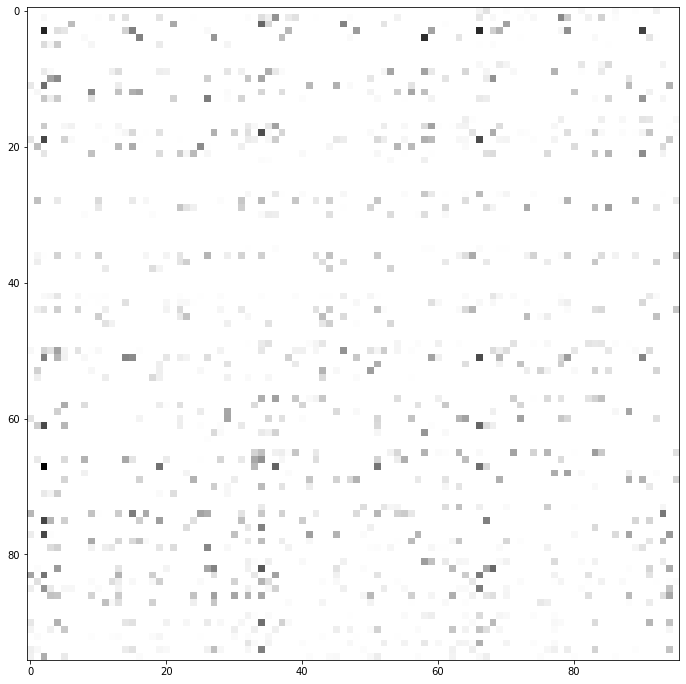

Displaying activation map 5
The activations for the layer is [3512.9875   762.78894 4923.8706  3970.5027  4054.4463   343.44888
 1043.7502  3142.1282     0.       566.0489  3693.53     665.2144
 4552.994   1245.7126  3118.3206  1884.5612  1447.7999  3337.4512
 1253.3441  1032.3059  4302.3843   438.75214 1712.2545   924.40924
  972.73444]


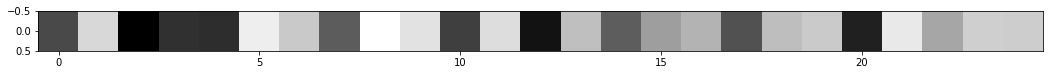

Displaying activation map 6
The activations for the layer is [5193.526     0.        0.     6302.24   6390.081   509.2333 1452.1881
 5126.2046    0.        0.     5612.0894  566.0703 7011.6987    0.
    0.     2780.155  1698.5833 4941.6807 1531.2668 1560.6376    0.
  610.2562    0.      839.8535    0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


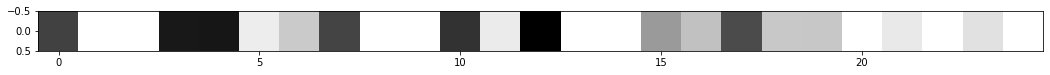

Displaying activation map 7
The activations for the layer is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


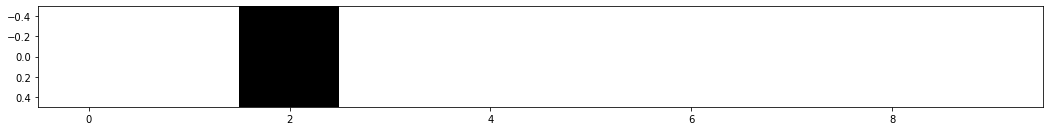

In [154]:
#test image for 2

test_image(x_test_img_2,111)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


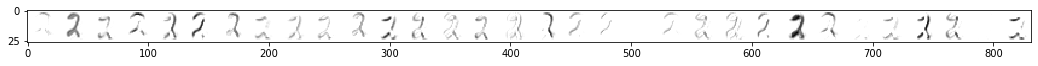

Displaying activation map 1


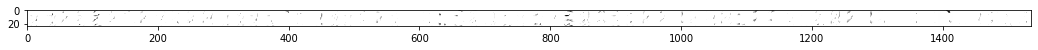

Displaying activation map 2


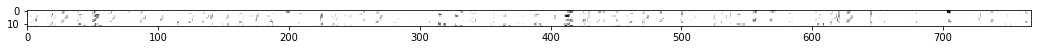

Displaying activation map 3


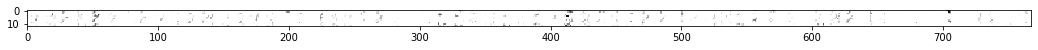

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


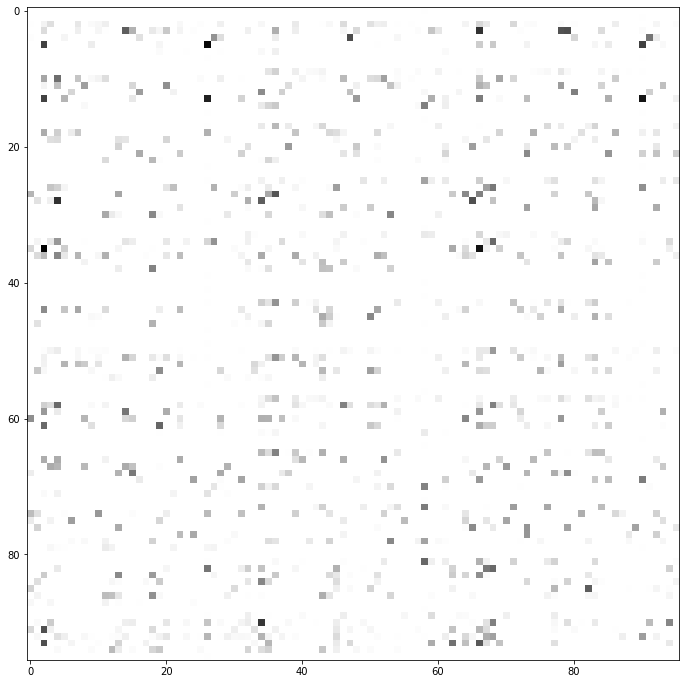

Displaying activation map 5
The activations for the layer is [3368.0964 1265.823  4270.6333 3094.9668 3184.0552 1089.4747 1864.8914
 2183.601  1407.8596 1938.913  4034.6719 1395.0145 4123.5425 1741.0491
 1842.5742 2280.7139 2438.2112 3448.4744 2081.1187 1111.2083 3199.875
 1501.9978 1814.497  2055.5542 1731.8129]


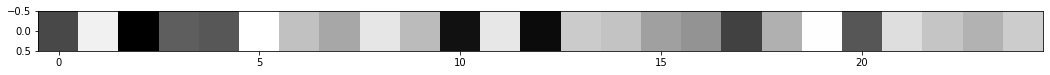

Displaying activation map 6
The activations for the layer is [5609.6895 1897.4071    0.        0.        0.        0.        0.
 3705.2983 2383.8801 3135.9834 6320.107     0.     7075.358  2815.5452
    0.     3561.7068    0.        0.     3212.984  2094.6077 5546.9673
 2484.8918 2872.422  3281.7634    0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


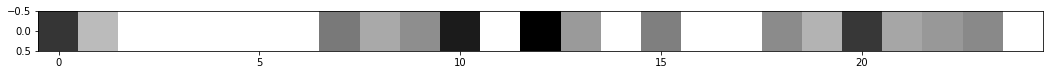

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


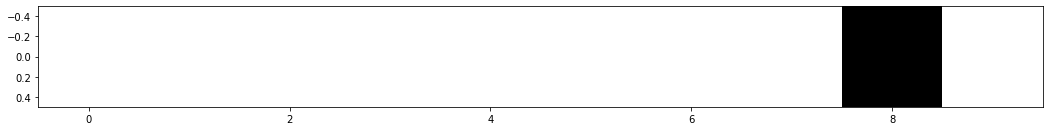

In [155]:
#test image for 2

test_image(x_test_img_2,767)

In [157]:
#retrieveing images for num 3

x_test_img_3=img_samenum(x_test_filter,y_test_filter,3)

(1010, 28, 28)
(1010, 28, 28, 1)


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


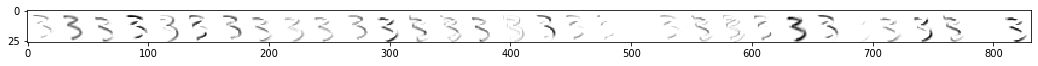

Displaying activation map 1


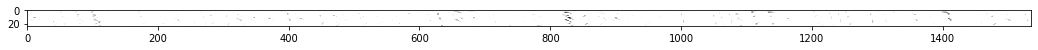

Displaying activation map 2


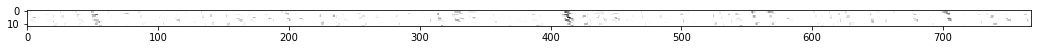

Displaying activation map 3


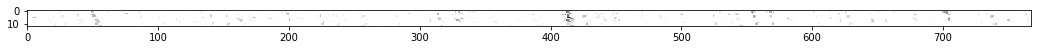

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


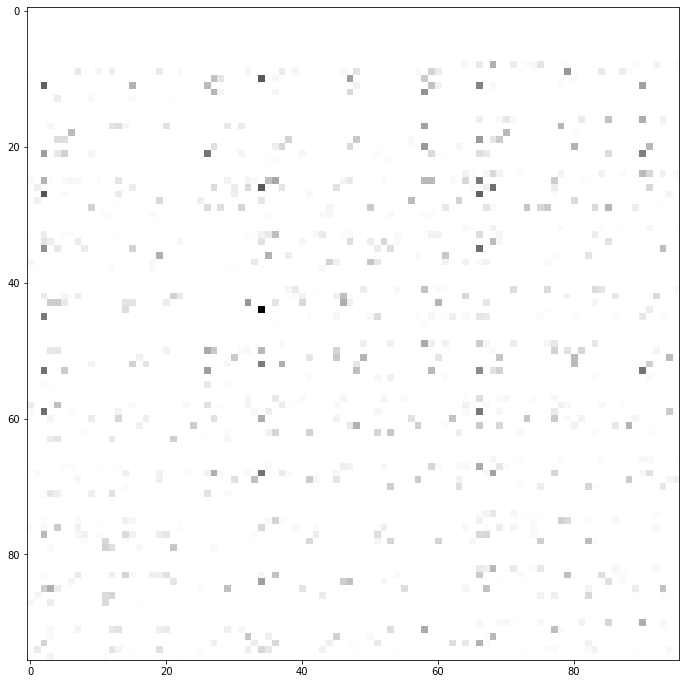

Displaying activation map 5
The activations for the layer is [ 467.94757 1198.7539  3175.133    901.8826   724.5837     0.
 1213.1752   866.0198     0.      1616.9667  3480.5435   346.43732
 1964.7755  2648.7383  1434.6367  3332.82    3330.3308  3520.242
  851.4172  3513.6553  1845.1307  3879.969   2197.3745   424.0493
 1059.2979 ]


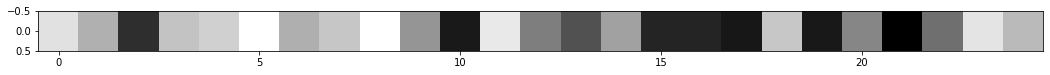

Displaying activation map 6
The activations for the layer is [   0.      1831.549      0.         0.      1065.4144     0.
    0.      1712.5641   197.25603    0.      5631.2466   823.19244
 3339.675   4025.672      0.      4967.1104  5116.6646     0.
  990.4065     0.      2985.4229  5850.724      0.         0.
 1513.8595 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


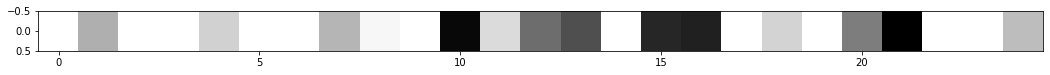

Displaying activation map 7
The activations for the layer is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


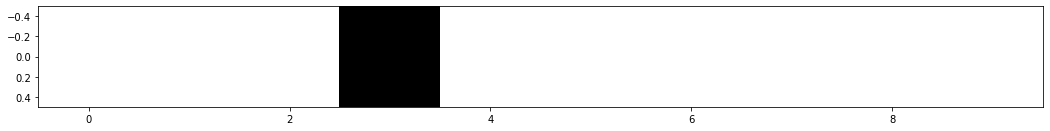

In [158]:
#test image for 3

test_image(x_test_img_3,767)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


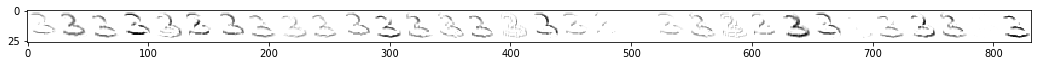

Displaying activation map 1


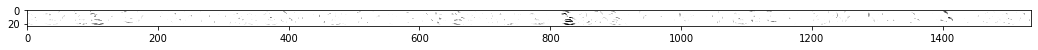

Displaying activation map 2


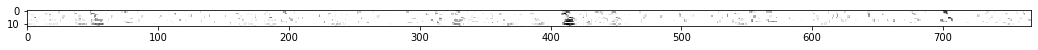

Displaying activation map 3


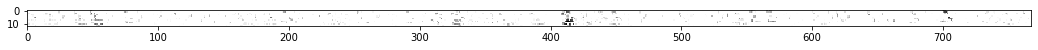

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


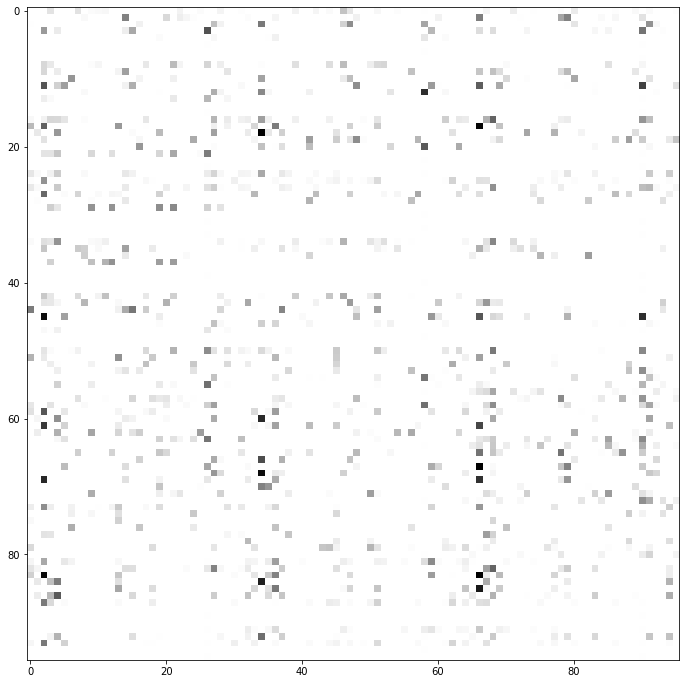

Displaying activation map 5
The activations for the layer is [1317.0294  1051.7386  4536.278   1716.9576  1459.9562   624.49225
  648.58813 2465.8352     0.       878.9669  3103.1843   415.98926
 1643.0907  2296.0833  2052.5217  2973.6438  3171.9165  4411.3965
 1633.4808  3723.625   2460.6667  2258.4282  2497.451   1595.9065
  904.78876]


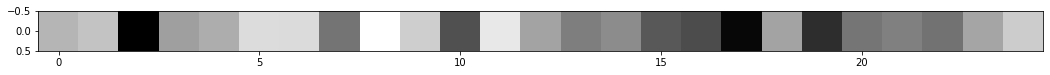

Displaying activation map 6
The activations for the layer is [2136.7803 1646.2628    0.        0.     2526.6016 1080.407     0.
 3294.2095    0.     1115.3474 5071.5396    0.        0.     3724.6
    0.     4234.581  4670.351  6439.4526 2420.5166 5060.598     0.
 3607.546  3675.5796 2566.822  1108.4413]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


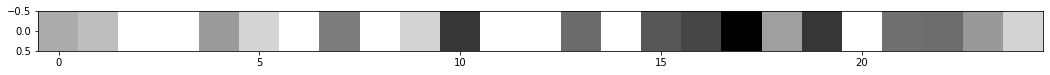

Displaying activation map 7
The activations for the layer is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


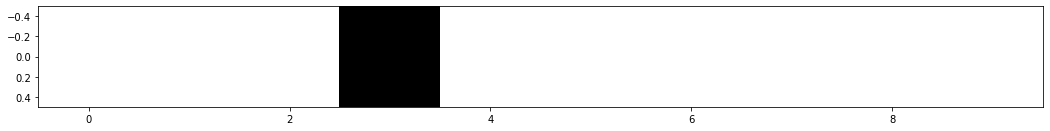

In [159]:
#test image for 3

test_image(x_test_img_3,347)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


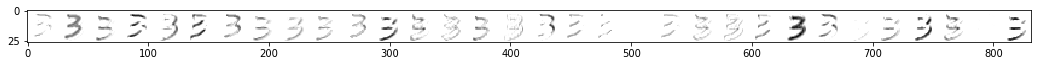

Displaying activation map 1


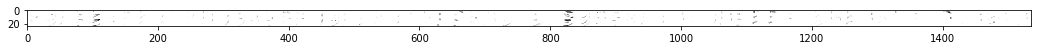

Displaying activation map 2


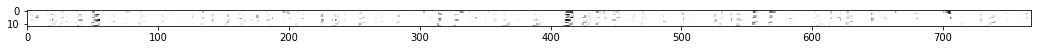

Displaying activation map 3


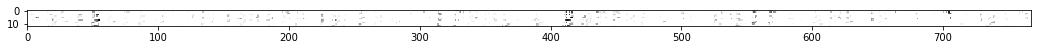

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


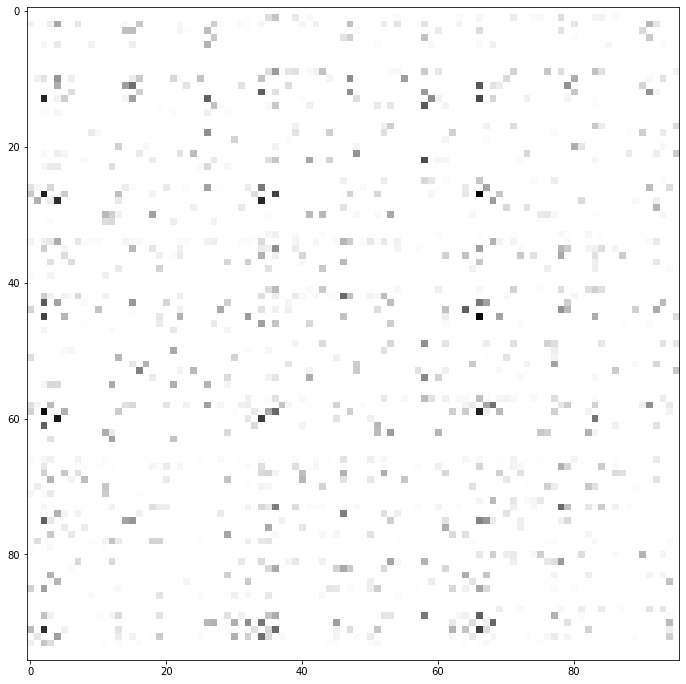

Displaying activation map 5
The activations for the layer is [1758.9143  1252.8561  3803.5955  1104.3762  1349.5656   786.61847
  949.204   1912.9905   926.0757  2320.1174  4366.1636  1015.78735
 1932.2611  2941.3276  1999.1294  3475.6587  4164.3413  4619.8223
 1036.2091  4467.4614  1778.7974  4393.5566  1829.5615   867.4681
 1080.4432 ]


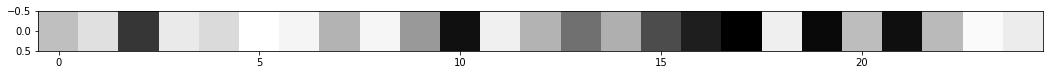

Displaying activation map 6
The activations for the layer is [2411.6875    0.        0.        0.        0.     1134.7849    0.
    0.        0.     3305.6453    0.        0.     2787.9036 4531.5376
    0.     5937.8267    0.        0.     1778.5679 7054.8794 2620.142
    0.     2843.723  1378.8198 1796.4318]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


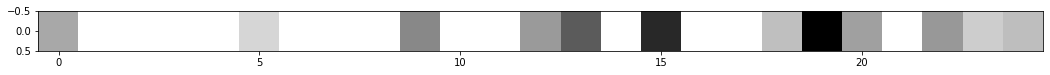

Displaying activation map 7
The activations for the layer is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


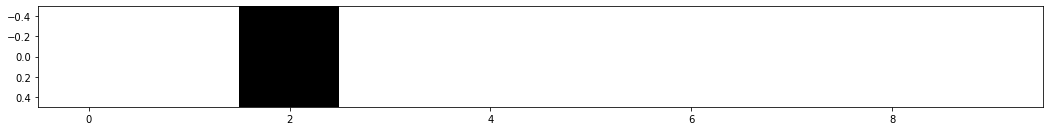

In [160]:
#test image for 3

test_image(x_test_img_3,967)

(982, 28, 28)
(982, 28, 28, 1)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


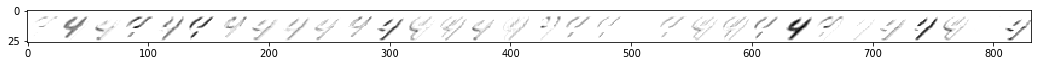

Displaying activation map 1


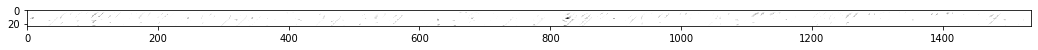

Displaying activation map 2


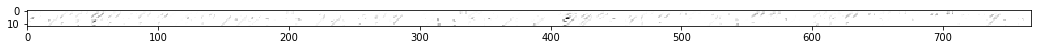

Displaying activation map 3


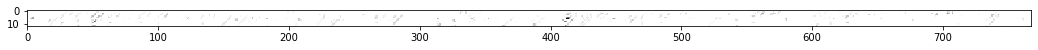

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


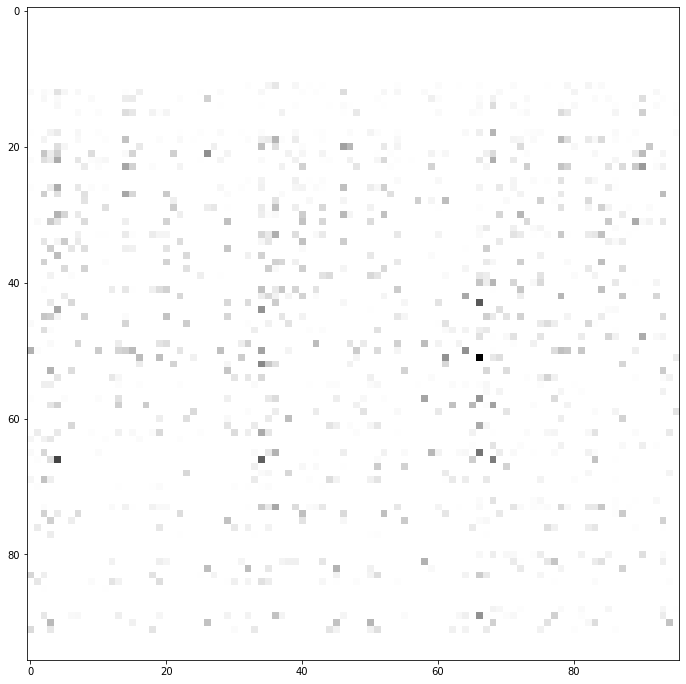

Displaying activation map 5
The activations for the layer is [ 705.7209  3355.1606  2951.2195  1782.8007  1928.5524  1699.4329
 2598.4011  3076.6614   951.39215 2393.941   1860.0153  1933.1251
 1601.0684  2007.1168  3595.915   2759.9456  1703.8854  2213.2903
 2672.1802  4046.2927  4156.905   2226.272   4189.3047  2294.8184
 1840.7522 ]


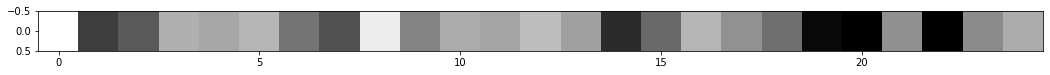

Displaying activation map 6
The activations for the layer is [ 961.01685    0.      4519.8496     0.      2872.7517  2410.422
 3885.0862     0.      1316.0724  3174.0757     0.      3042.6326
 2255.8909     0.      5275.9883     0.         0.      3149.1812
    0.      5932.738      0.      3019.882      0.         0.
    0.     ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


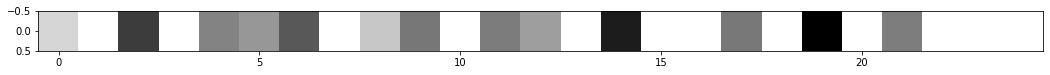

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


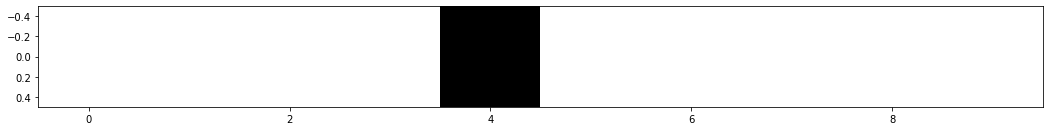

In [161]:
#retrieveing images for num 4

x_test_img_4=img_samenum(x_test_filter,y_test_filter,4)

#test image for 4

test_image(x_test_img_4,677)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


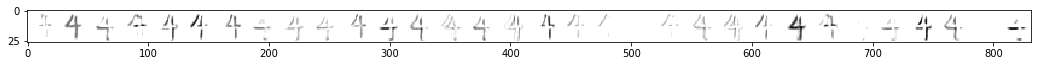

Displaying activation map 1


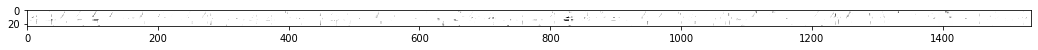

Displaying activation map 2


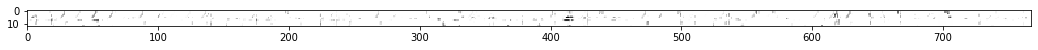

Displaying activation map 3


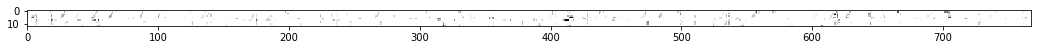

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


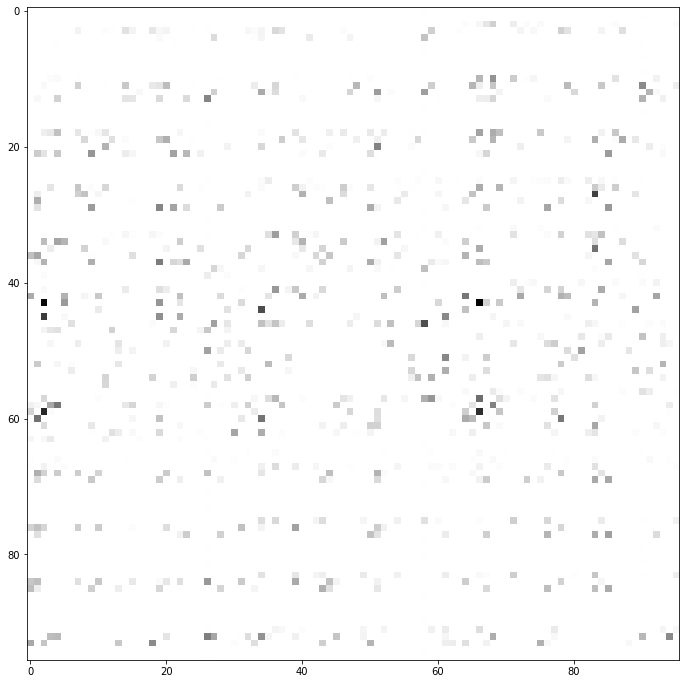

Displaying activation map 5
The activations for the layer is [1177.0885 4553.1816 2865.9678  614.5743  897.8325 1675.6462 3484.7363
 3791.666  1248.6108 1761.3411 2263.9133 3185.8135 1560.6357 1595.5787
 3232.2854 3259.456  1386.3291 1264.1046 1239.8479 3622.2915 4709.2295
 1352.005  3711.8596 1714.6946 1578.1416]


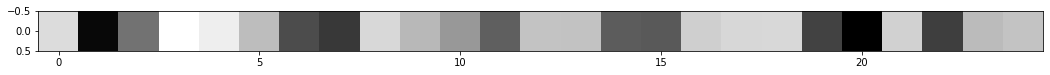

Displaying activation map 6
The activations for the layer is [2261.3171 6517.0747 4680.356   914.172     0.     3003.4224 5134.6895
 5848.6865 2309.6704 2796.1187 3631.3616 4861.097  2554.8286    0.
 4806.1997 4912.166     0.     2314.473  2142.2026    0.        0.
 1952.161     0.        0.     2587.1033]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


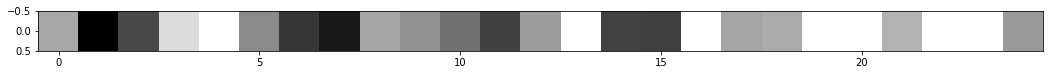

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


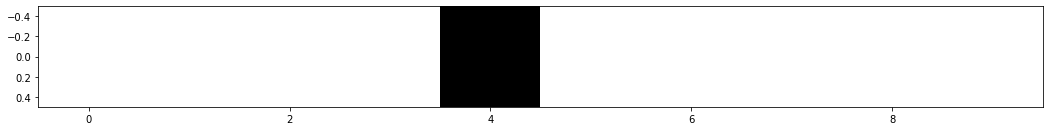

In [162]:

#test image for 4

test_image(x_test_img_4,177)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


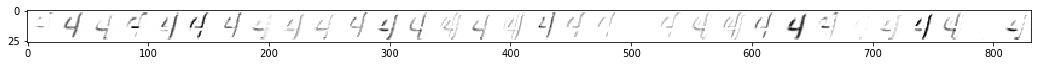

Displaying activation map 1


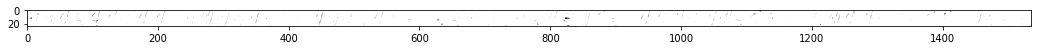

Displaying activation map 2


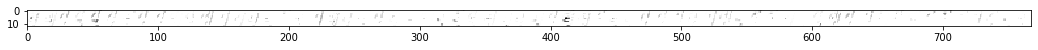

Displaying activation map 3


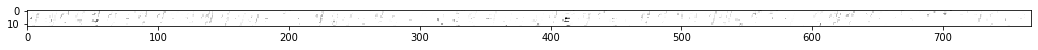

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


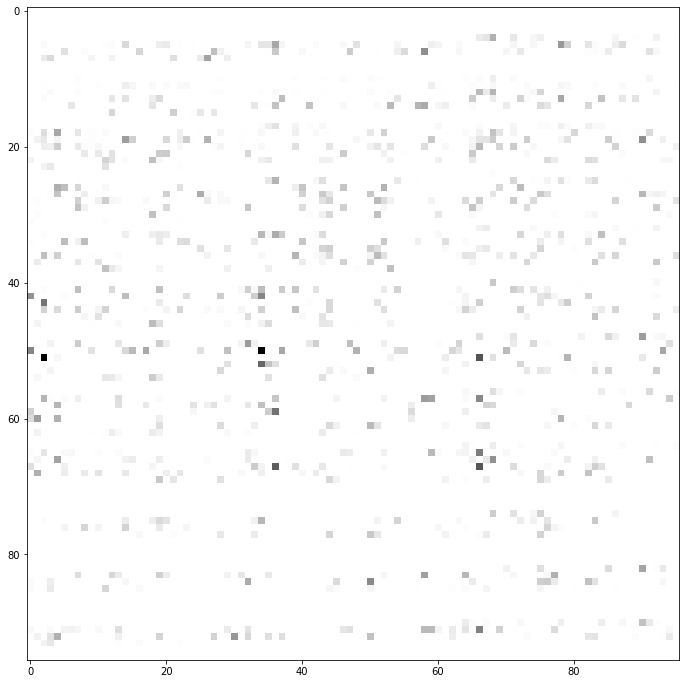

Displaying activation map 5
The activations for the layer is [1152.1155 4309.3345 3543.2312 1108.5405 1541.2914 3009.1528 3212.0657
 4561.103  1361.9584 2460.0032 1809.7468 3464.9397  683.644  1739.3804
 4176.3525 3524.4958 1758.7946 2337.1987 2503.9255 4774.4434 4149.8574
 1247.8407 4193.761  2667.227  1791.8738]


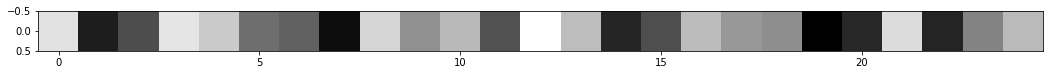

Displaying activation map 6
The activations for the layer is [   0.         0.      5888.4834     0.         0.         0.
 5343.9966     0.      2486.2725  3751.1948  3144.2258     0.
  954.16064 2235.001   6225.1885  6088.5503  3246.8325  4107.2695
    0.         0.      6123.2466     0.      6575.696   4367.475
    0.     ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


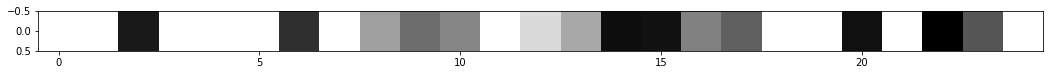

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


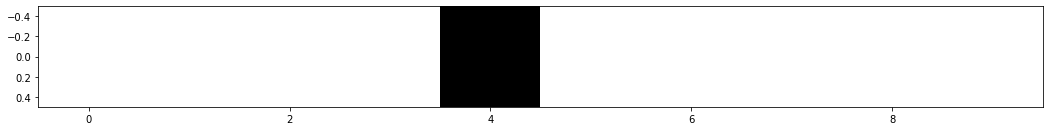

In [163]:

#test image for 4

test_image(x_test_img_4,977)

(892, 28, 28)
(892, 28, 28, 1)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


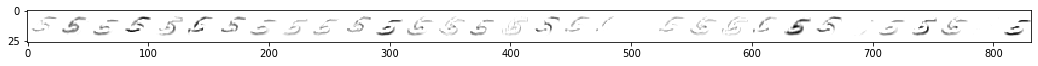

Displaying activation map 1


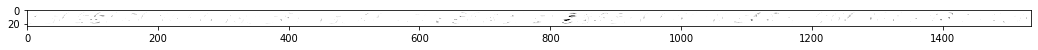

Displaying activation map 2


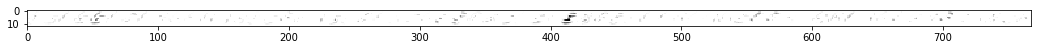

Displaying activation map 3


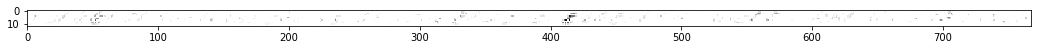

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


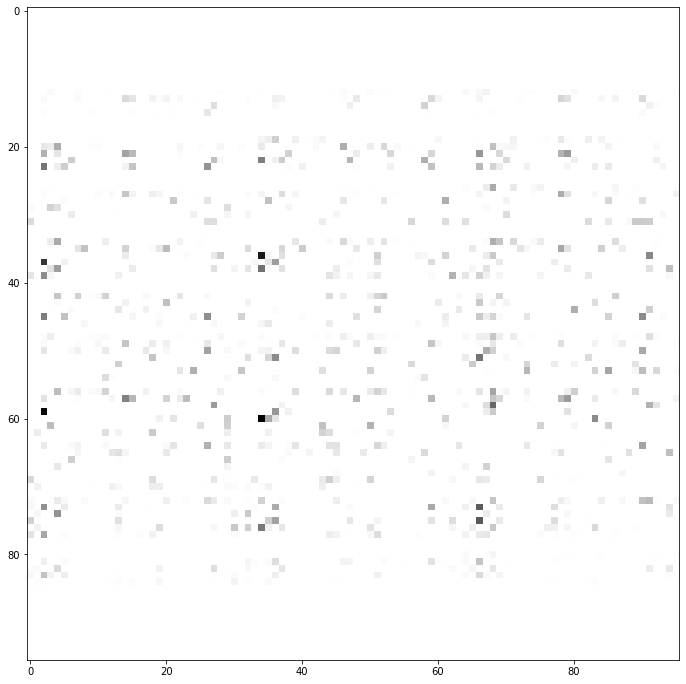

Displaying activation map 5
The activations for the layer is [   0.      1974.2361  1630.8109  1630.3156  1442.8219  1351.7203
 1048.415    967.2904     0.      2745.0461  1831.1693   218.3058
  496.13776 1738.382   2855.9485  1455.5076  2192.2195  3460.6714
 2893.0532  4116.965   1589.7263  3376.3608  3678.0344  2455.8071
  695.3235 ]


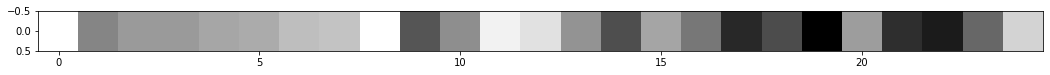

Displaying activation map 6
The activations for the layer is [   0.     3006.0967    0.        0.     2356.464  1954.7595    0.
  998.6898    0.        0.     2639.3625    0.      824.6114 2025.511
    0.     1718.7523 2737.0857    0.        0.     5579.1084    0.
    0.        0.     3890.3032    0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


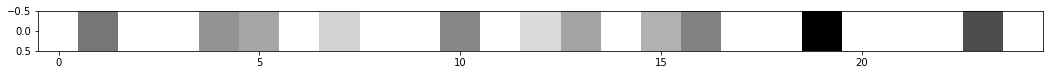

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


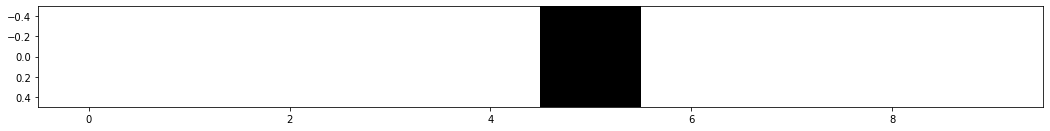

In [164]:
#retrieveing images for num 5

x_test_img_5=img_samenum(x_test_filter,y_test_filter,5)

#test image for 5

test_image(x_test_img_5,677)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


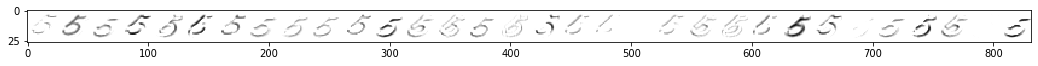

Displaying activation map 1


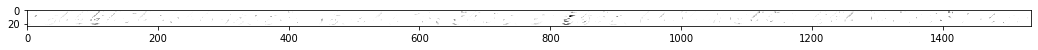

Displaying activation map 2


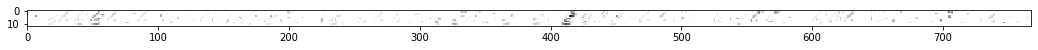

Displaying activation map 3


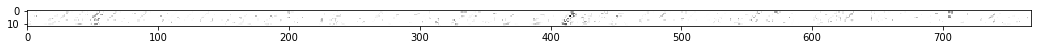

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


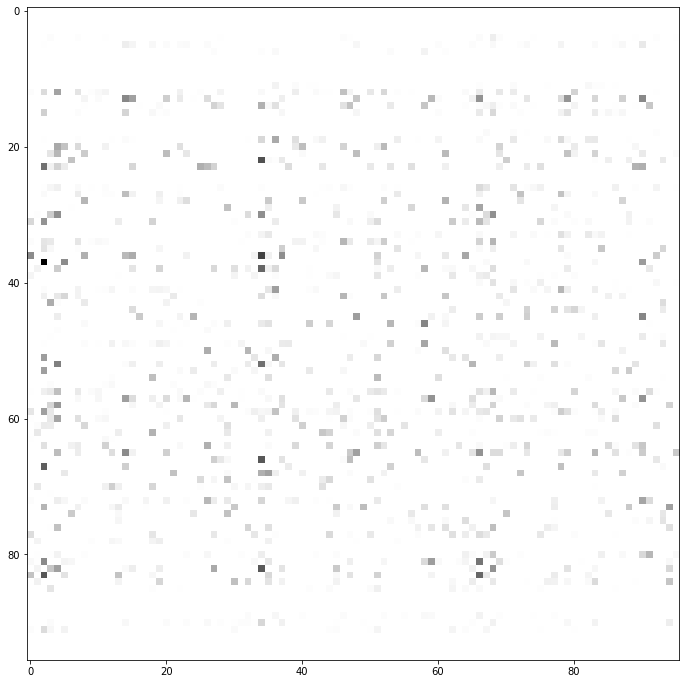

Displaying activation map 5
The activations for the layer is [  53.012154 1605.3385   2097.4475   2008.2352   1735.2139   1275.3129
 1619.4637    848.24084     0.       3080.787    1755.4332    440.85516
  969.99524  1533.2245   3525.667    1724.6096   3168.641    4377.9307
 4576.998    4066.6704   1597.6049   2872.9133   4686.1343   3982.6533
  729.8296  ]


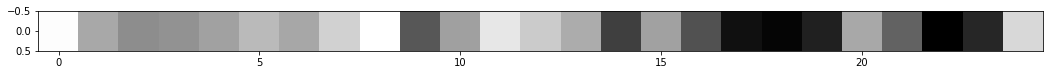

Displaying activation map 6
The activations for the layer is [   0.      2401.8362  3725.8328  3716.616   3379.1978     0.
 2302.15       0.         0.         0.      3372.6423   778.66376
 1541.4446  2323.0833  5474.9443  3294.7075     0.         0.
 6687.4062  5996.847   2185.6748  4071.3125  6746.9375     0.
    0.     ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


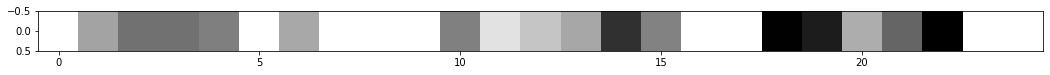

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


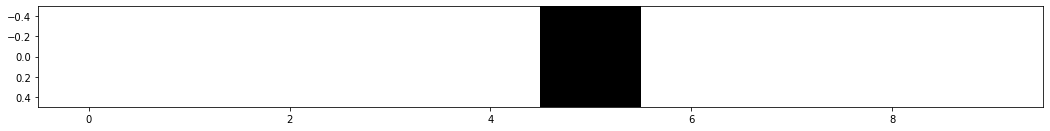

In [165]:
#test image for 5

test_image(x_test_img_5,877)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


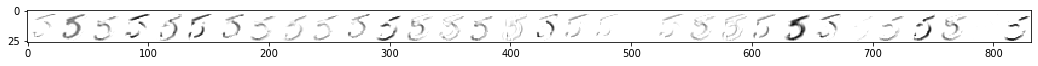

Displaying activation map 1


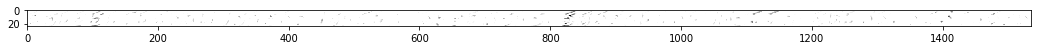

Displaying activation map 2


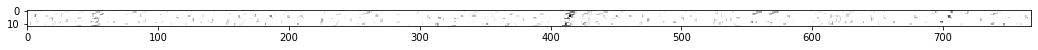

Displaying activation map 3


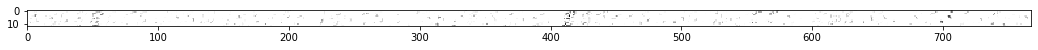

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


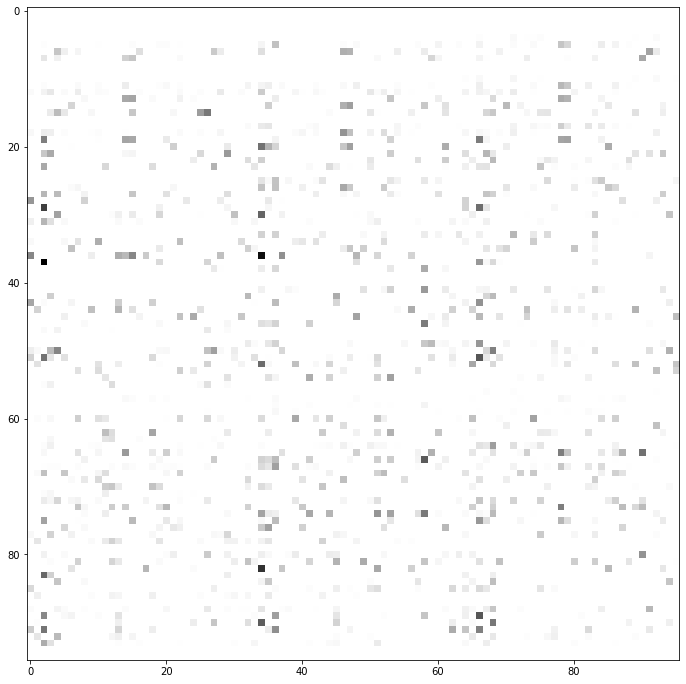

Displaying activation map 5
The activations for the layer is [ 821.55237 1346.4813  1931.1647  1489.9022  1928.4033  1240.2766
 1293.8064   883.02576  717.8117  4031.2903  2412.3748    47.5409
 1914.772   1779.6375  3175.375   1725.4484  3116.5867  3650.1245
 3812.572   3779.453   1824.2651  3755.904   3259.1826  2908.1433
 1691.2555 ]


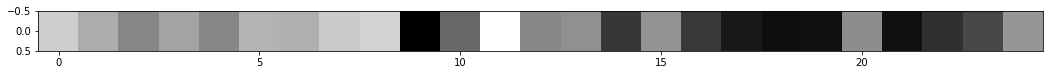

Displaying activation map 6
The activations for the layer is [   0.      2461.3218     0.         0.         0.      2014.7275
 2484.3853  1121.8188     0.      6224.2646  3905.2078    76.59692
 3279.1663  3021.2039  5361.258   3016.1853  5254.8257     0.
 6589.888   5999.2695  2736.4548     0.      5765.936   5014.5957
    0.     ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


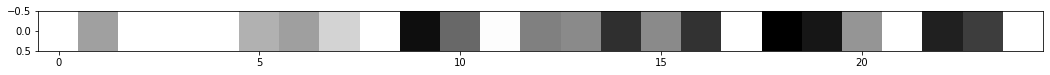

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


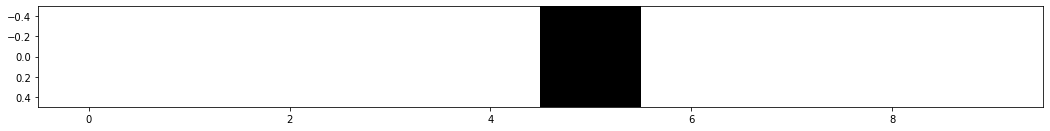

In [166]:
#test image for 5

test_image(x_test_img_5,377)

(958, 28, 28)
(958, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


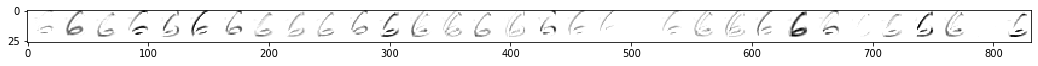

Displaying activation map 1


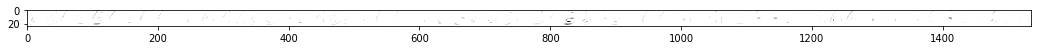

Displaying activation map 2


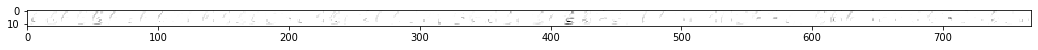

Displaying activation map 3


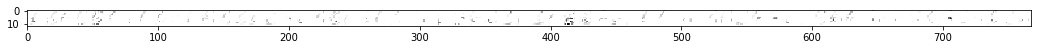

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


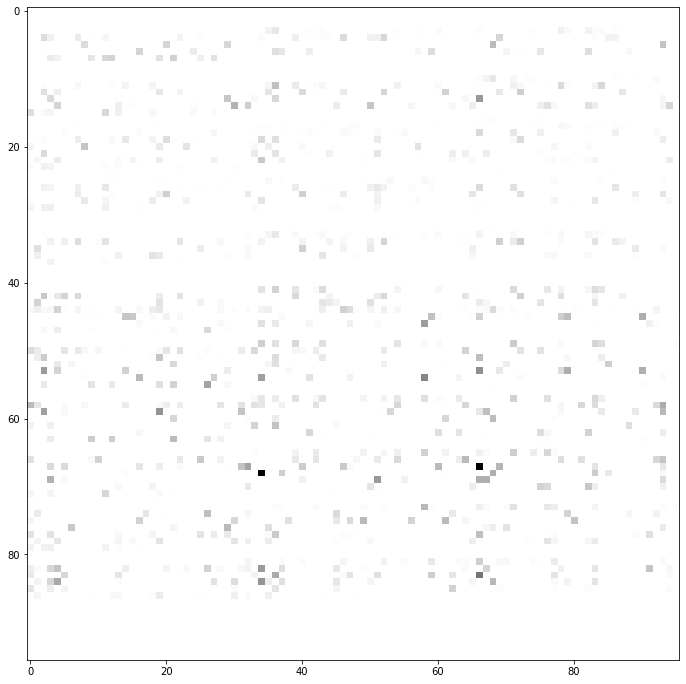

Displaying activation map 5
The activations for the layer is [1024.3304   3116.6296   1965.4652   4018.2825   3943.3076   2759.1611
 2882.59     1591.4716      0.       1575.8488   3553.3467     28.027792
 2119.141    1305.858    1726.0522   1507.3243    789.74646  3583.8806
 4478.025    1386.5874   2502.1501    913.20435  4632.806    3999.9033
 1297.8873  ]


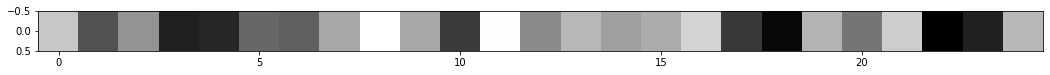

Displaying activation map 6
The activations for the layer is [ 930.4071 5165.483     0.     6295.238  5939.811  4937.887  4144.877
    0.        0.     2403.0605 4972.316     0.     2567.5137 2221.3865
 2233.8157    0.     1175.1193 5485.8154    0.        0.        0.
 1532.255  7286.686  6202.843  2071.954 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


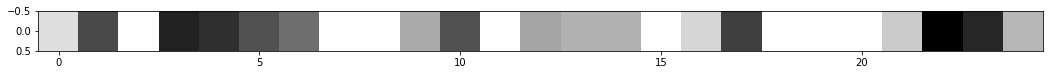

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


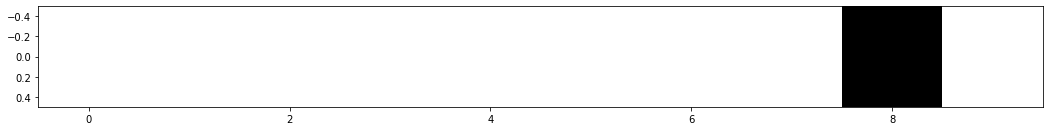

In [167]:
#retrieveing images for num 6

x_test_img_6=img_samenum(x_test_filter,y_test_filter,6)

#test image for 6

test_image(x_test_img_6,677)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


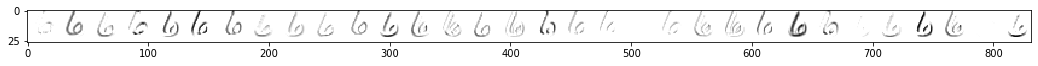

Displaying activation map 1


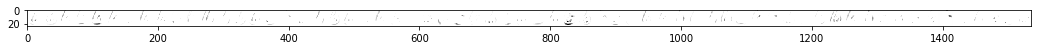

Displaying activation map 2


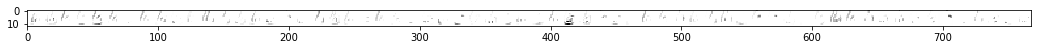

Displaying activation map 3


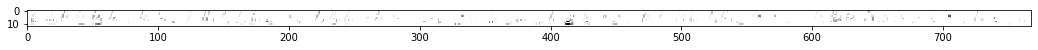

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


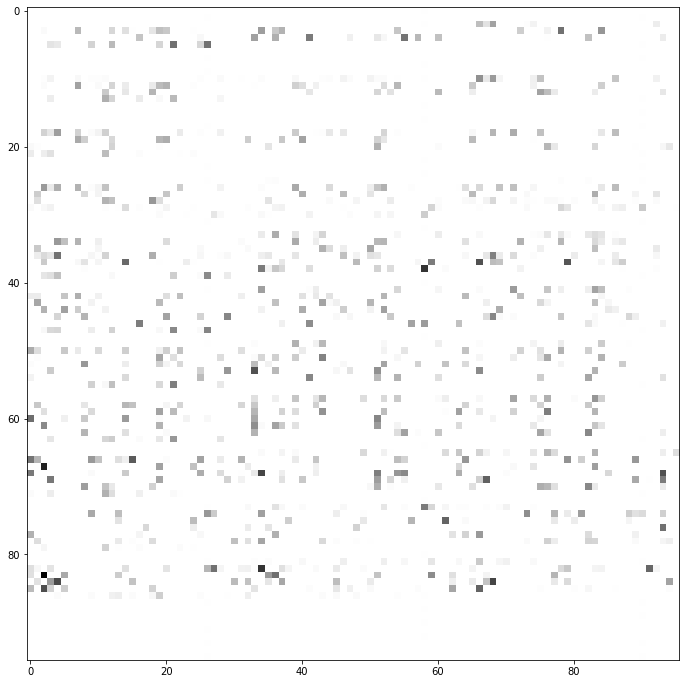

Displaying activation map 5
The activations for the layer is [1214.065   3773.2302  2219.7617  4250.052   4045.6467  3393.5232
 3905.7026  1684.4944   199.72711 2202.56    3704.4958   715.3847
 2067.6733  1219.6113  1828.5469  2517.0442  2087.3303  3341.435
 5380.7007  1147.7511  1728.0651   202.14743 4500.94    4659.7183
 1577.807  ]


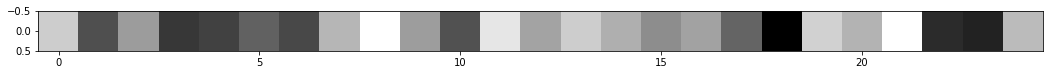

Displaying activation map 6
The activations for the layer is [   0.        0.        0.     6883.702  6548.723  5321.5786 6110.9614
 2822.4443    0.     3074.8516 5569.21   1014.5877 3128.8318 1339.1926
    0.     3303.072  2764.3665    0.        0.        0.        0.
    0.     7356.255  7263.638     0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


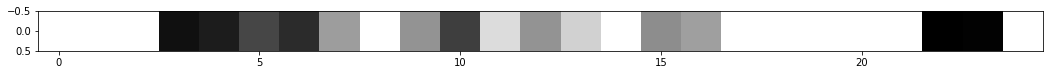

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


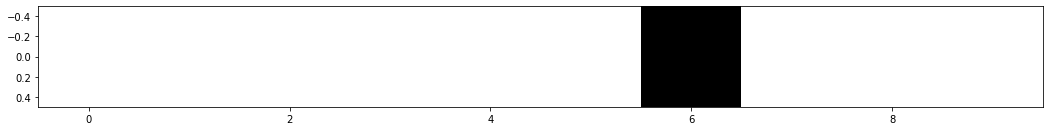

In [168]:
#test image for 6

test_image(x_test_img_6,277)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


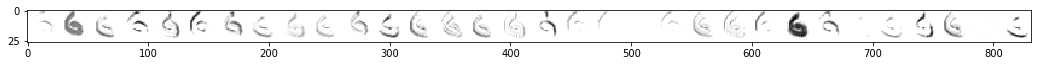

Displaying activation map 1


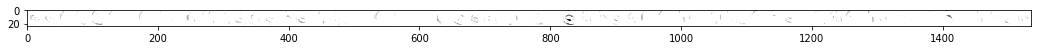

Displaying activation map 2


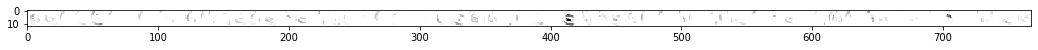

Displaying activation map 3


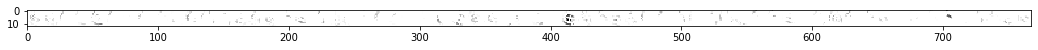

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


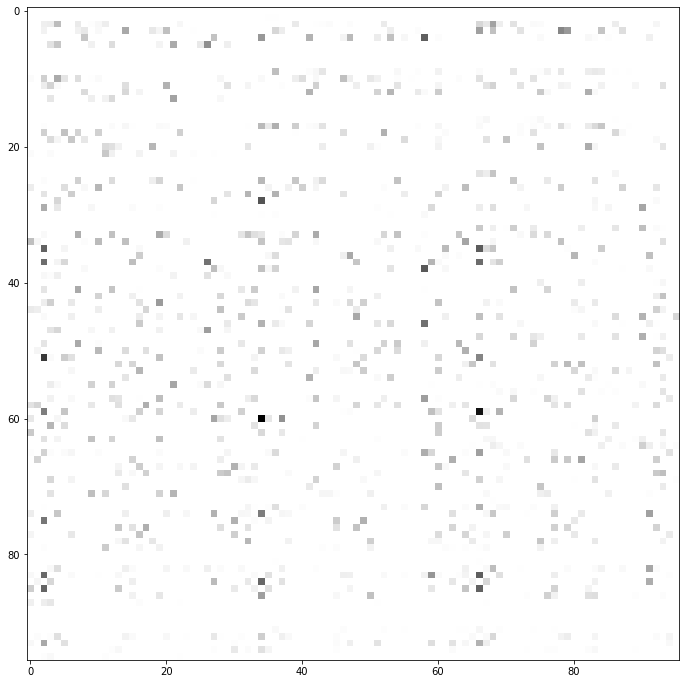

Displaying activation map 5
The activations for the layer is [   0.      3558.2244  1985.743   2794.6245  2837.6174  2777.9976
 2570.3826  2276.958    107.9167  1764.2051  2404.8418   365.56625
  600.85785 1430.6598  2204.5327  1243.4384   983.8844  2827.631
 4186.704   2385.6946  2428.6577  1618.7666  4522.558   4462.7456
  959.6327 ]


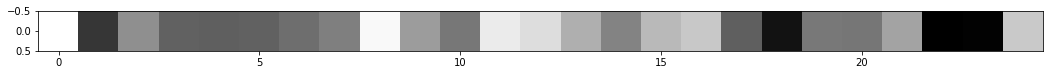

Displaying activation map 6
The activations for the layer is [   0.        0.     3160.622  4149.7715 4428.7046 4154.0083 4591.4727
    0.        0.        0.        0.        0.        0.        0.
    0.        0.        0.        0.     6489.489  3929.8591 4008.2324
 2778.4668    0.     6983.6406 1412.5507]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


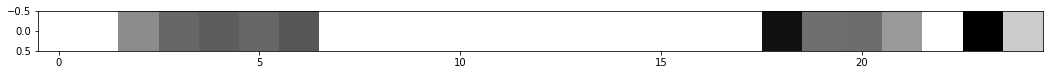

Displaying activation map 7
The activations for the layer is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


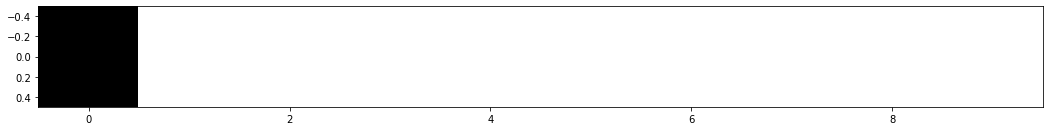

In [169]:
#test image for 6

test_image(x_test_img_6,77)

(1028, 28, 28)
(1028, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


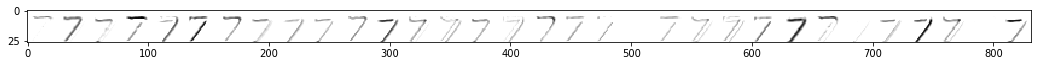

Displaying activation map 1


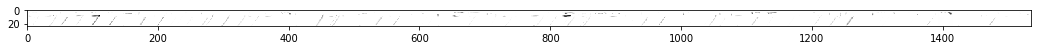

Displaying activation map 2


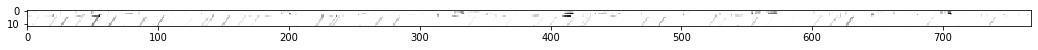

Displaying activation map 3


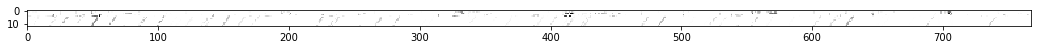

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


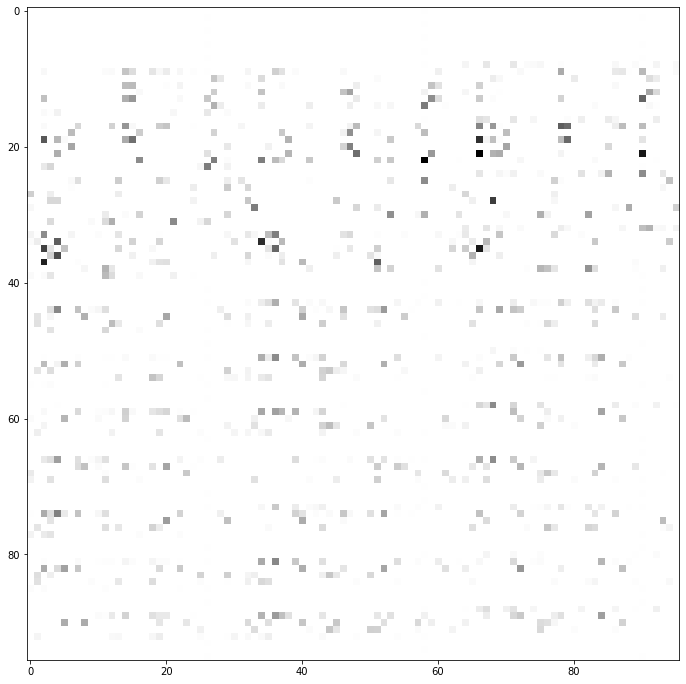

Displaying activation map 5
The activations for the layer is [3568.222   3361.176   2138.932   1265.4851  1454.9423  1243.0928
 3103.1626  1404.445   3502.0276  4164.1924  4419.5234  3023.3643
 3833.1572  1689.76     561.06256 3107.0144  3805.0378  2103.1782
 1177.0317  1566.0132  1794.0514  2576.5017   399.1297   317.41867
 2529.7456 ]


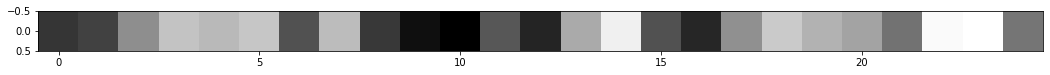

Displaying activation map 6
The activations for the layer is [   0.      4883.08    3495.9883  1845.5375  2225.4612     0.
    0.         0.      4788.1094  5612.482      0.      4126.246
 5284.777      0.       623.96106 4338.67       0.      2846.1138
 1920.5225  2320.1138     0.      3398.1387     0.      1046.9417
    0.     ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


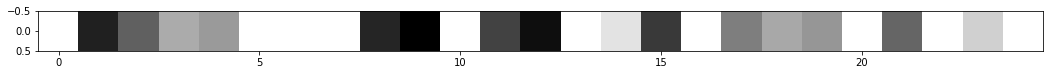

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


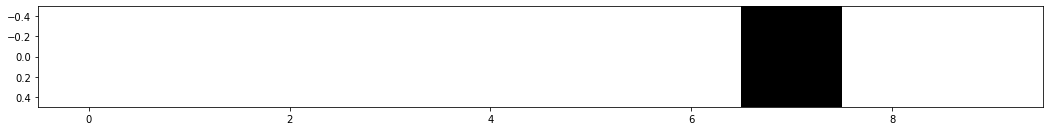

In [171]:
#retrieveing images for num 7

x_test_img_7=img_samenum(x_test_filter,y_test_filter,7)

#test image for 7

test_image(x_test_img_7,677)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


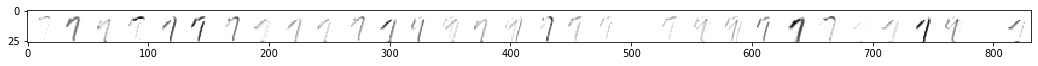

Displaying activation map 1


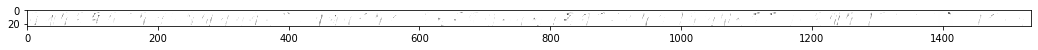

Displaying activation map 2


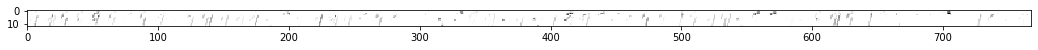

Displaying activation map 3


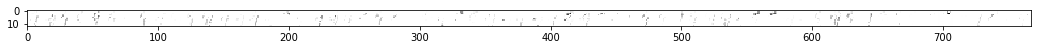

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


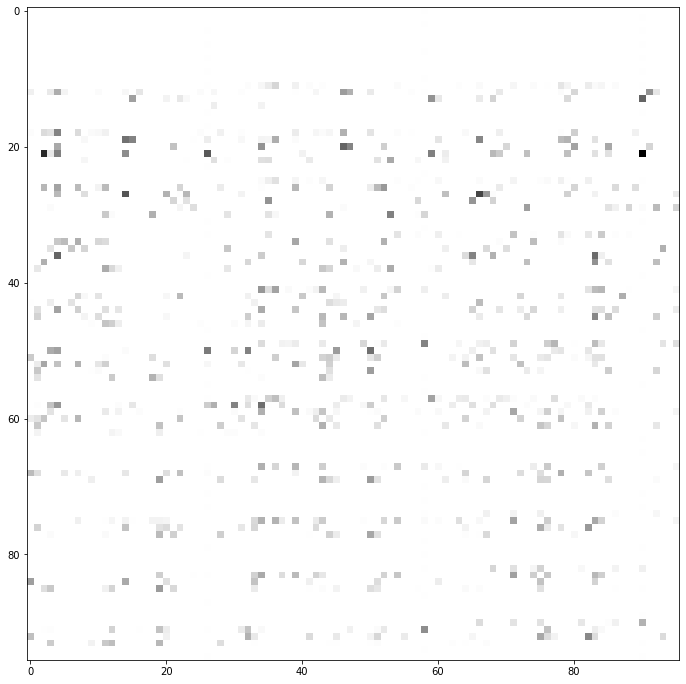

Displaying activation map 5
The activations for the layer is [3314.2634 3775.9478 1790.7286 1097.3146 1619.417  2443.741  3236.5386
 2249.179  3214.861  4417.554  3705.9258 3014.939  3395.3018 1706.1987
 1931.633  2826.949  3135.5261 1867.9752 2256.6772 2224.9172 2573.6138
 1805.9634 1935.5474 1524.9146 2808.681 ]


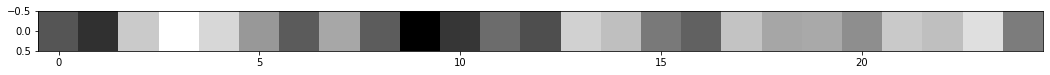

Displaying activation map 6
The activations for the layer is [   0.     5866.6094    0.        0.     2124.719  3560.1233    0.
 3263.7651 5097.113  6850.0376 5692.2144    0.        0.     2567.9019
    0.     4663.2466 4987.394     0.     3409.9065 3526.2388    0.
 3091.7168 3065.8088 2222.6145 4475.462 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


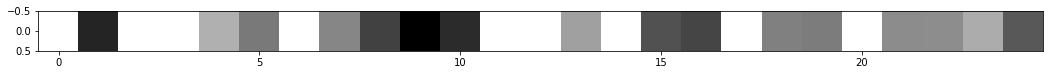

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


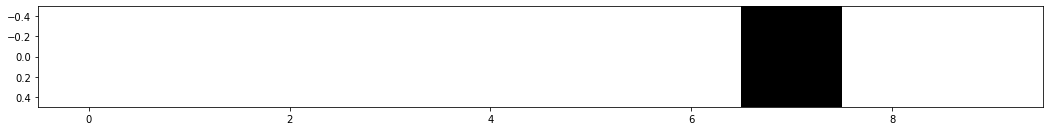

In [172]:
#test image for 7

test_image(x_test_img_7,277)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


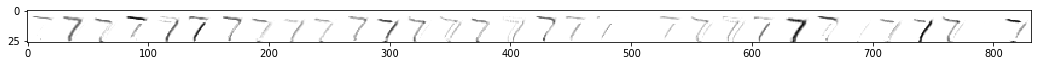

Displaying activation map 1


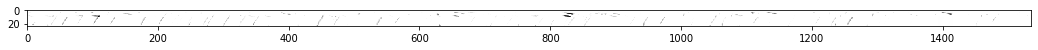

Displaying activation map 2


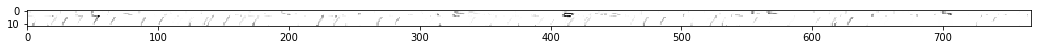

Displaying activation map 3


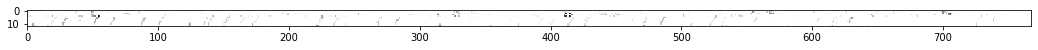

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


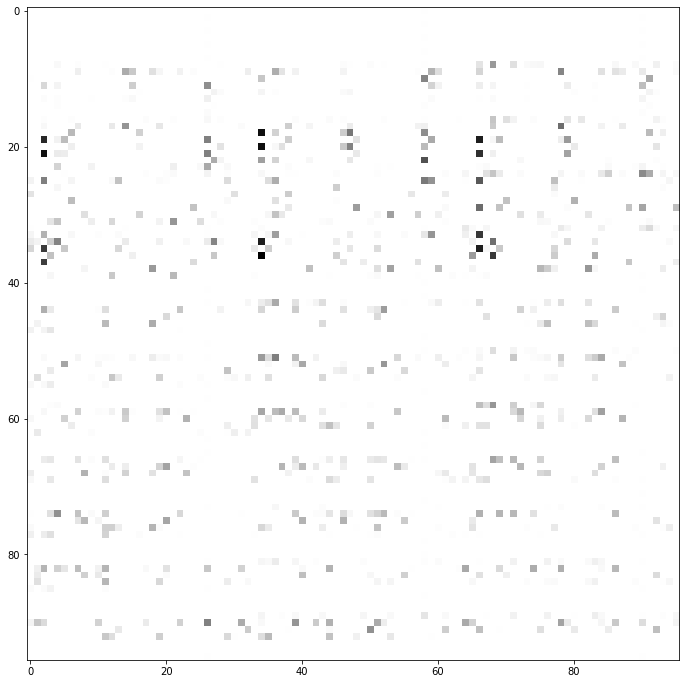

Displaying activation map 5
The activations for the layer is [3386.2527  3239.594   2193.1965  1168.0305  1405.01     540.3871
 3304.677    897.96924 3227.8257  3734.633   4157.663   2861.645
 4122.4517  1644.4785   388.83304 3144.1406  3516.9294  1568.1571
 1140.0969  1094.8895  1927.0856  2403.7527  1055.5254   858.7277
 2508.472  ]


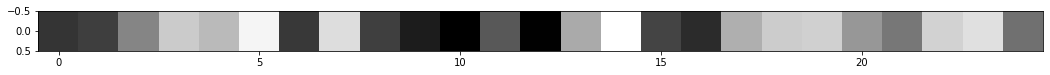

Displaying activation map 6
The activations for the layer is [5440.715  5408.733     0.     1855.1859 2174.3428 1859.8213    0.
    0.     5630.3823    0.        0.        0.        0.     2537.0562
    0.     4699.9707    0.     2380.0479 2096.065  1772.1064    0.
    0.        0.     1373.0326 4368.6377]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


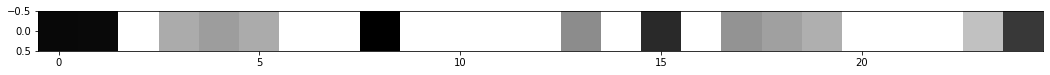

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


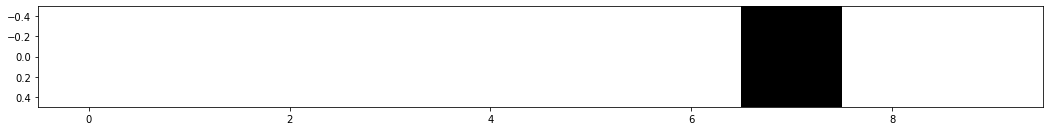

In [173]:
#test image for 7

test_image(x_test_img_7,777)

(974, 28, 28)
(974, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


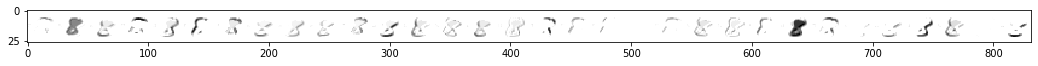

Displaying activation map 1


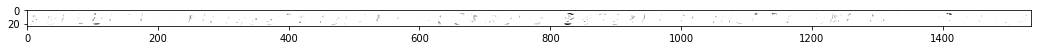

Displaying activation map 2


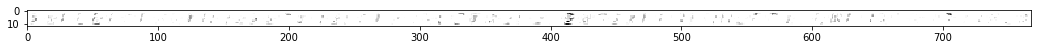

Displaying activation map 3


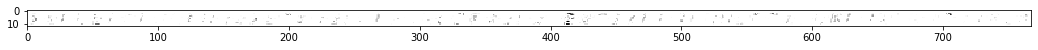

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


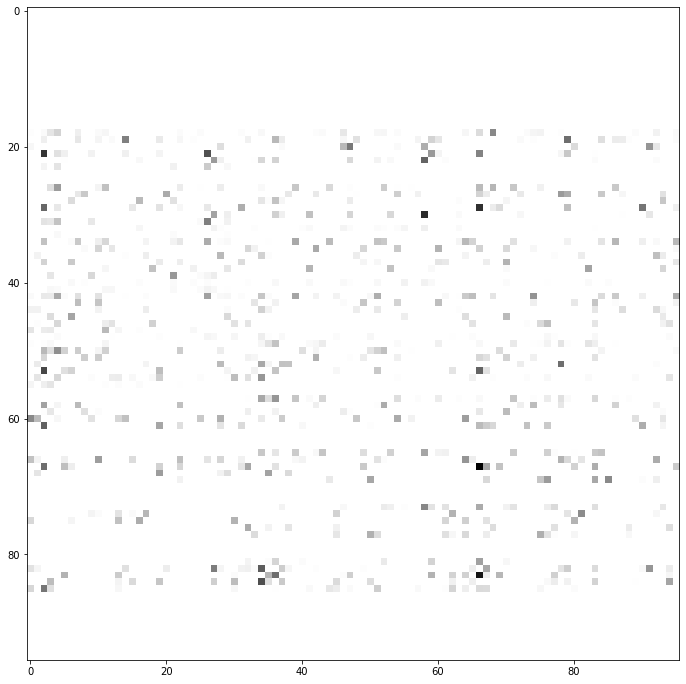

Displaying activation map 5
The activations for the layer is [1483.3435  2016.6239  3291.2764  2383.2642  2500.9094  1724.7502
 2023.737   1205.7931   565.8051  1852.3958  3063.2537   390.90573
 3362.0703  2779.1743  1831.3433  1684.3407  1994.7411  2986.8662
 4293.785   1680.9519  2831.4536  2344.816   4051.45    3688.7551
 2500.8335 ]


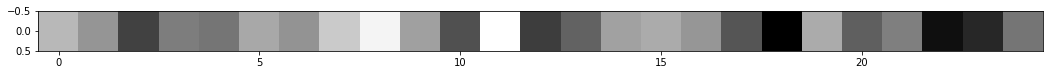

Displaying activation map 6
The activations for the layer is [   0.        0.     4933.663     0.        0.        0.        0.
    0.     1313.304     0.     4490.8477    0.     4701.794     0.
    0.     2134.6458    0.     4415.9688    0.     2587.8708 4521.74
 3248.0166 5959.916     0.     3936.56  ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


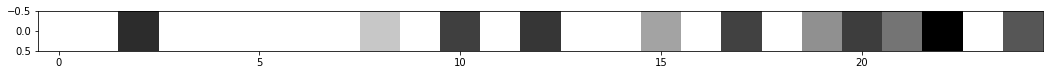

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


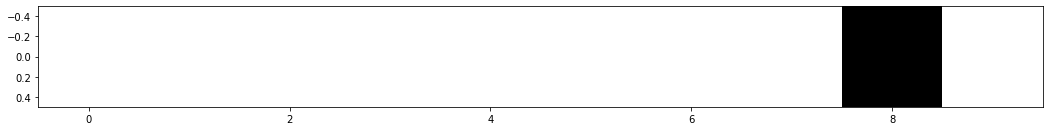

In [174]:
#retrieveing images for num 8

x_test_img_8=img_samenum(x_test_filter,y_test_filter,8)

#test image for 8

test_image(x_test_img_8,777)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


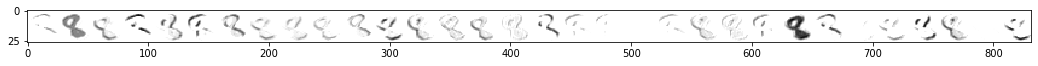

Displaying activation map 1


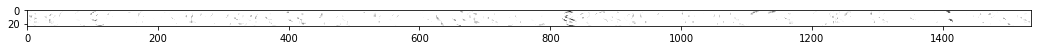

Displaying activation map 2


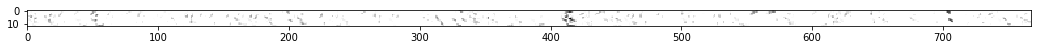

Displaying activation map 3


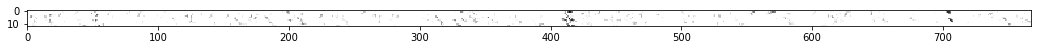

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


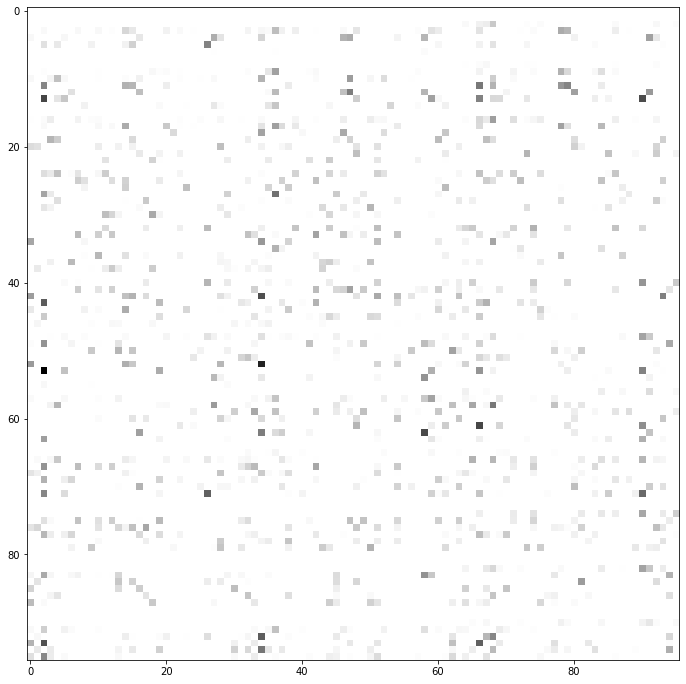

Displaying activation map 5
The activations for the layer is [1420.7424 1004.4699 3668.5464 1038.0502 1924.3597 1925.8131 1038.8534
 2166.9006 1145.8002 1466.5188 2033.4406 1220.0315 3136.6304 2780.2676
 1909.2085  908.8853  870.1463 1604.7076 2864.4329 2007.0986 4382.3296
 2705.2947 3401.6392 3435.0217 3338.9429]


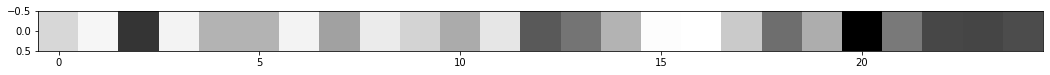

Displaying activation map 6
The activations for the layer is [   0.        0.     5514.473     0.     3743.733  3599.481  1584.4148
    0.     2002.9586 2497.2625 2744.9624 1713.889  5054.031  4170.8477
 2880.9001 1401.5925 1615.2845 2705.0305 5046.452     0.     6138.586
 3836.0825    0.     5569.489     0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


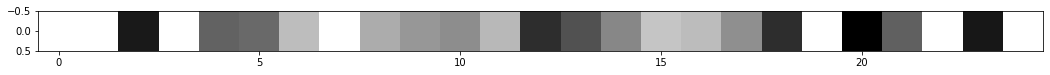

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


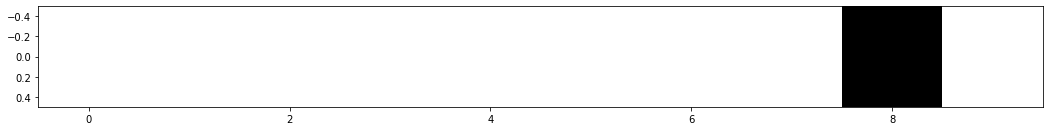

In [175]:
#test image for 8

test_image(x_test_img_8,888)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


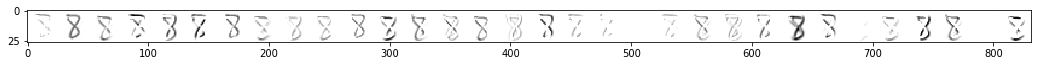

Displaying activation map 1


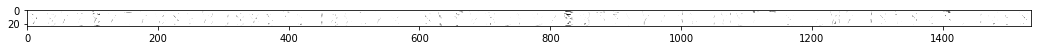

Displaying activation map 2


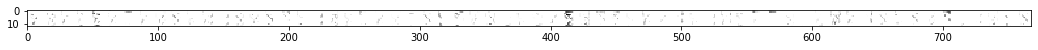

Displaying activation map 3


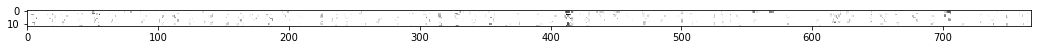

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


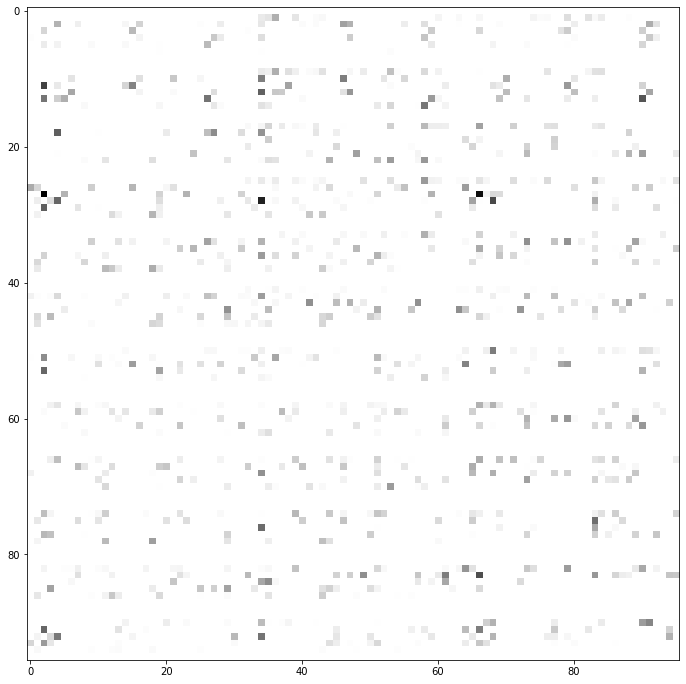

Displaying activation map 5
The activations for the layer is [1979.3042   777.2748  4457.045   1278.8959  2065.2866   577.53467
 2025.392   1372.159   1330.4327  1829.6366  2306.919   1135.6337
 5092.3296  3356.1152  1800.1543  2143.919   1909.4241  1795.8575
 3495.73    1536.6714  4214.555   2482.796   4321.2705  3315.8499
 3522.0496 ]


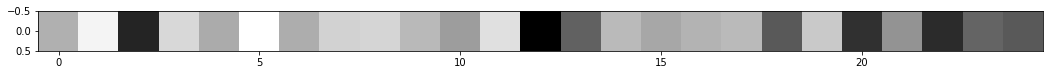

Displaying activation map 6
The activations for the layer is [   0.      1006.13275 6809.9834  2372.2124  3380.6082     0.
 2722.2432  2109.6562  1533.9707     0.      3468.0818     0.
 7314.867   5070.998      0.      3049.4524  2470.0515     0.
 5750.422      0.         0.      3549.4739  6478.8164  5265.283
 5482.926  ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


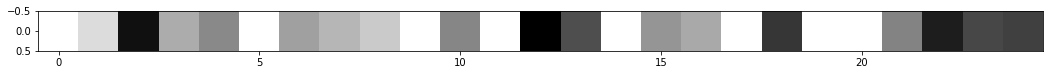

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


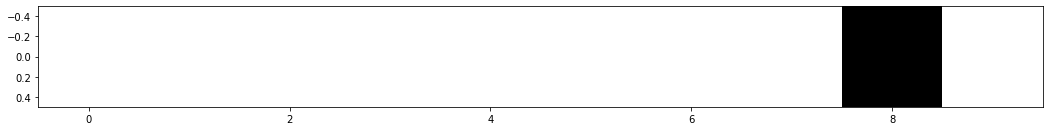

In [176]:
#test image for 8

test_image(x_test_img_8,111)

(1009, 28, 28)
(1009, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


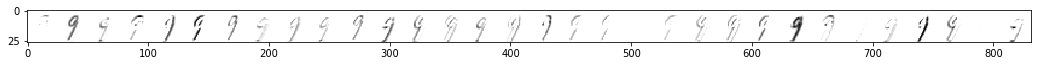

Displaying activation map 1


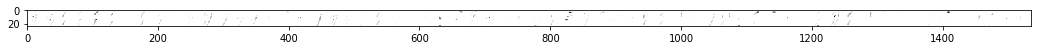

Displaying activation map 2


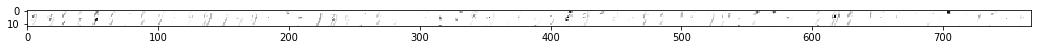

Displaying activation map 3


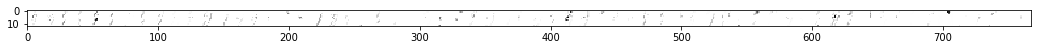

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


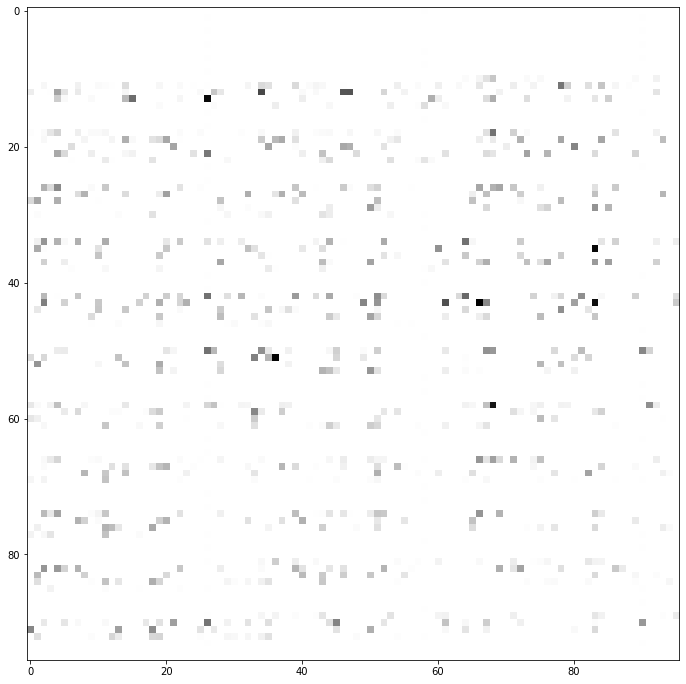

Displaying activation map 5
The activations for the layer is [1610.2666  3799.249   2649.2341   562.95184  812.95703 3134.3713
 2154.6245  3547.7324  2530.8667  3650.4482  2520.4946  2516.4094
 1852.0468  2716.3079  2418.6394  2143.707   1930.458   1625.5317
 2309.7324  3912.8594  4411.0205  2628.4583  2794.3977  2328.1238
 3195.9167 ]


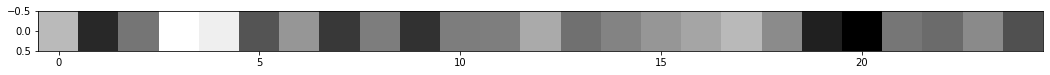

Displaying activation map 6
The activations for the layer is [2834.7964 5687.696     0.        0.        0.        0.        0.
 5023.069     0.     5402.222  3899.9558 3777.1086    0.     4073.0955
 3463.5435    0.     3145.4426    0.     3520.2937 5625.2124    0.
    0.     3951.0474    0.     4881.1836]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


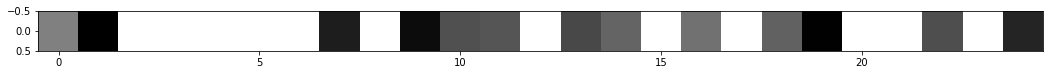

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


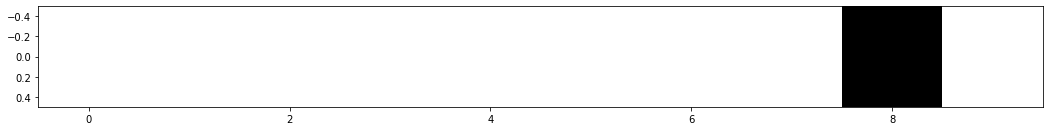

In [177]:
#retrieveing images for num 9

x_test_img_9=img_samenum(x_test_filter,y_test_filter,9)
#test image for 9

test_image(x_test_img_9,777)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


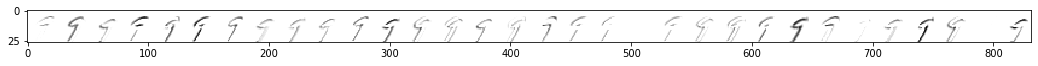

Displaying activation map 1


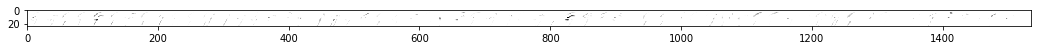

Displaying activation map 2


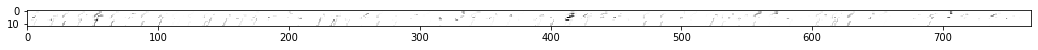

Displaying activation map 3


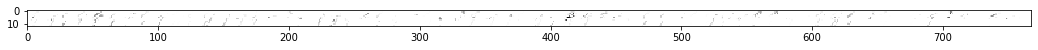

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


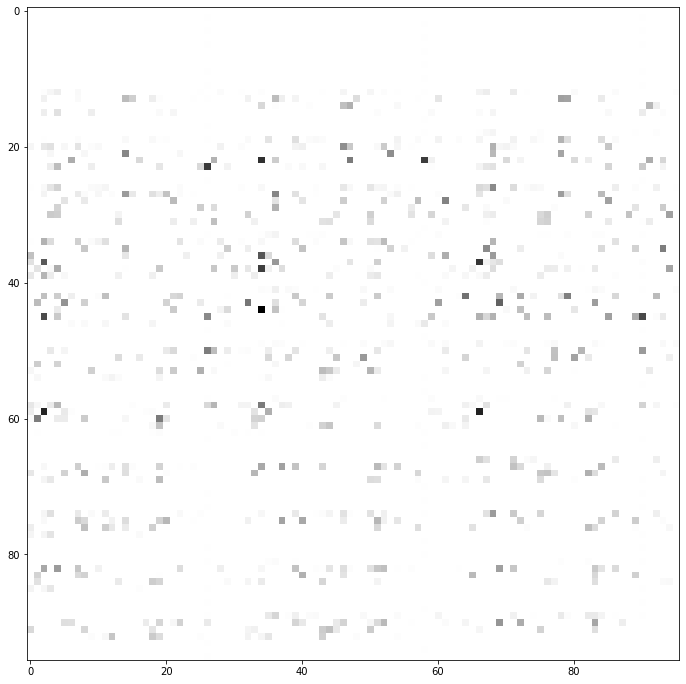

Displaying activation map 5
The activations for the layer is [1132.6481 3875.0735 1585.4829  913.8086 1056.9006 2526.0862 2524.6794
 1798.9758 2198.7332 3760.868  2496.0225 1974.615  1123.0145 2142.688
 2054.6008 1732.4272 2435.9084 2341.5603 2512.3206 3641.6873 2718.3254
 3120.5562 2914.9631 2436.1567 2057.128 ]


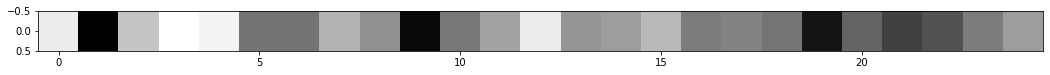

Displaying activation map 6
The activations for the layer is [1631.0924 6263.046  2452.2075 1323.1099    0.     4316.557  3233.644
 3415.542  3501.0337    0.     3771.4673    0.     1499.7916 3632.4062
    0.        0.     3628.3752 3469.3064    0.     5927.398  4602.913
 4982.7163 4644.382  3505.2168    0.    ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


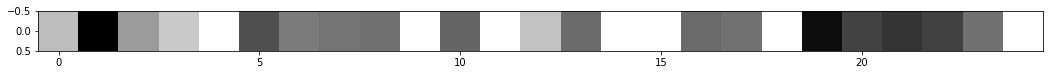

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


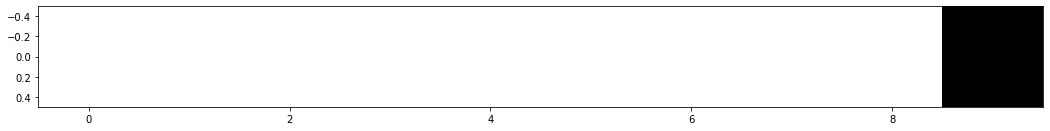

In [178]:
#test image for 9

test_image(x_test_img_9,999)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


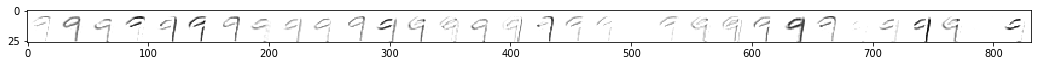

Displaying activation map 1


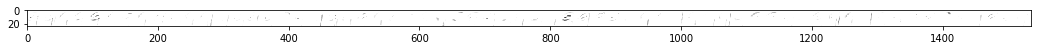

Displaying activation map 2


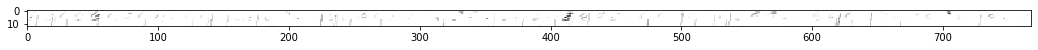

Displaying activation map 3


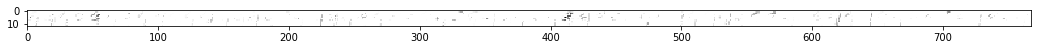

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


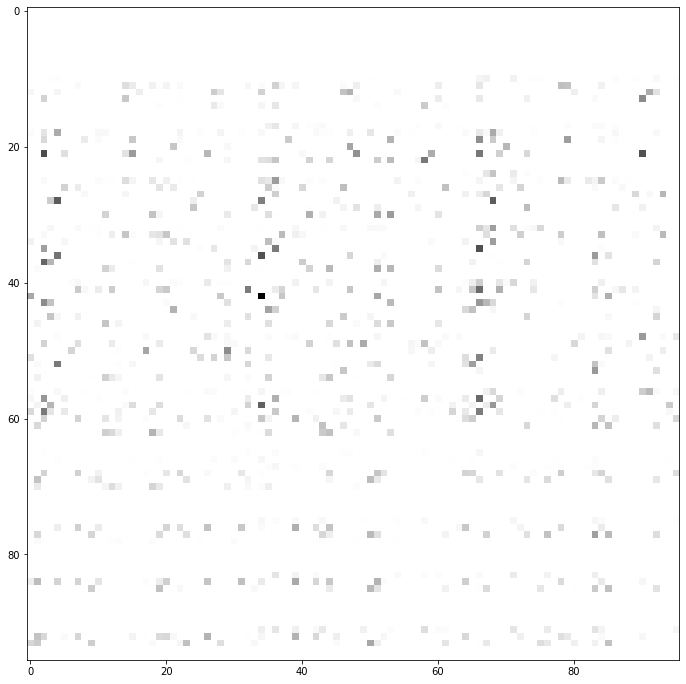

Displaying activation map 5
The activations for the layer is [1945.2375 4004.1519 2703.5576  638.4061  761.1006 2152.4683 1759.3652
 2781.0894 3085.8796 3744.1267 3823.2441 1788.928  2373.4294 3557.6797
 1334.6575 2301.3867 2197.745  1430.4069 1247.7872 3561.812  4003.043
 3852.0325 2088.75   1204.0143 3098.7493]


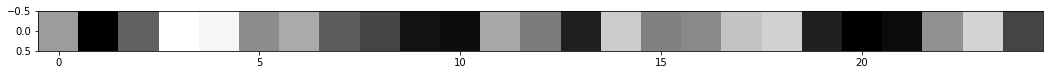

Displaying activation map 6
The activations for the layer is [   0.     6195.54   3434.47      0.     1242.164  3717.6326 3047.771
    0.     4831.5015    0.     5403.1743 3149.6372    0.        0.
 2461.135  3502.0618    0.     1795.7871 2202.485  5435.4233    0.
    0.     3222.8782    0.     4891.264 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


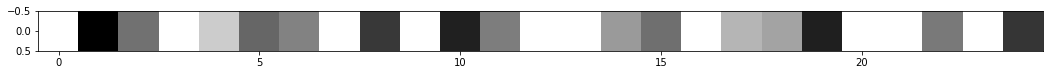

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


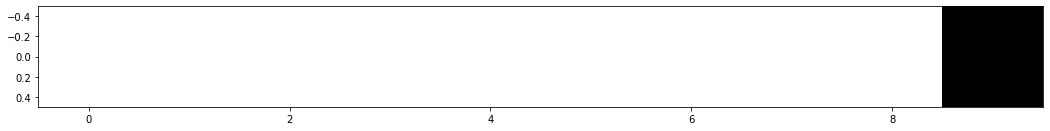

In [179]:
#test image for 9

test_image(x_test_img_9,333)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


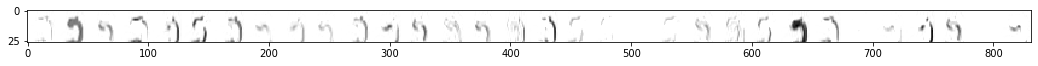

Displaying activation map 1


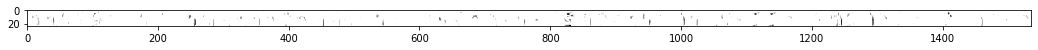

Displaying activation map 2


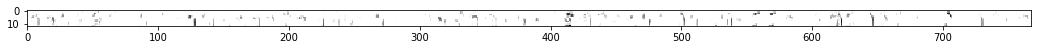

Displaying activation map 3


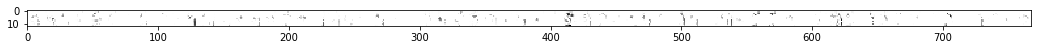

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


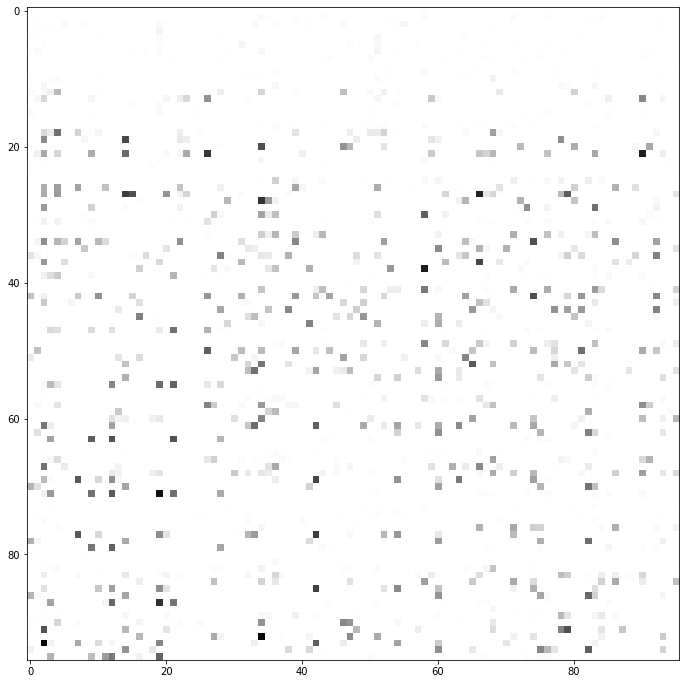

Displaying activation map 5
The activations for the layer is [  66.92604 2442.044   1341.0553   169.35207  135.79001 1604.5529
 1278.5159  1918.9016  1650.8921  2554.0435  1620.8694  1089.448
  727.80597 1619.9808  1337.4056  1362.7363  1444.9396  1199.0687
 1721.1333  2706.0583  2104.8875  2221.0813  1856.9612  1303.6532
 1904.5992 ]


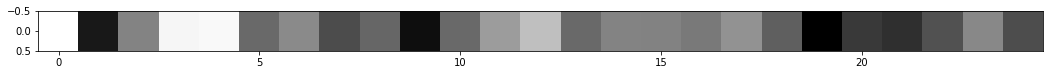

Displaying activation map 6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


The activations for the layer is [   0.        0.     1928.8304  660.9828    0.     2493.1404    0.
 2773.3064 2287.0332 3874.9617    0.        0.        0.     2457.794
 2129.6826 2681.0952 2314.9375 2150.9722 2565.2104 4397.27   2773.5178
 3475.3938 2759.2578 1898.4071    0.    ]


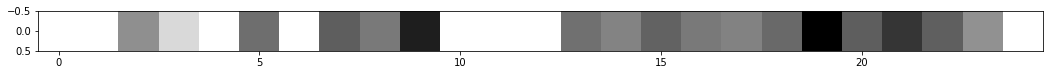

Displaying activation map 7
The activations for the layer is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


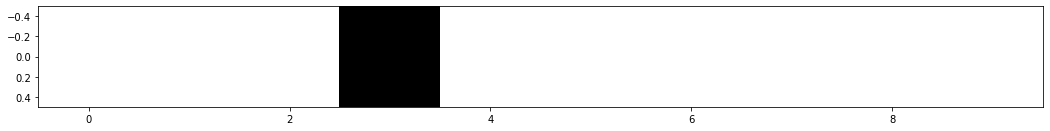

In [201]:
#cropping the image of 2

import cv2
from google.colab.patches import cv2_imshow
im_path = r'/gdrive/My Drive/datasetJPG/img_1.jpg'
img_2 = cv2.imread(im_path)
dim=(28,28)
crop_img_2 = img_2[0:16, 0:28,0:1] # Crop from {x, y, w, h } => {0, 0, 300, 400}

crop_img=cv2.resize(crop_img_2,dim,interpolation=1)

cv2_imshow(crop_img)
cv2.waitKey(0)


crop_test_2array=np.array(crop_img,dtype='float')
print(crop_test_2array.shape)

crop_test_2img=crop_test_2array.reshape(28,28,1)
crop_test_2img.shape

import numpy as np

test_image_crop =np.expand_dims(crop_test_2img, axis=0)
test_image_crop.shape

print(model.predict_proba(test_image_crop,batch_size=1))
print(test_image_crop.shape)

activation_crop=get_activations(model,test_image_crop)
display_activations(activation_crop)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


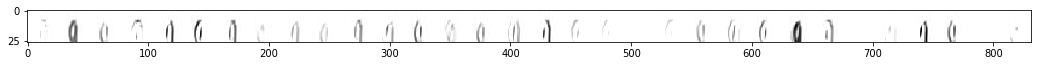

Displaying activation map 1


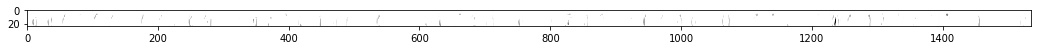

Displaying activation map 2


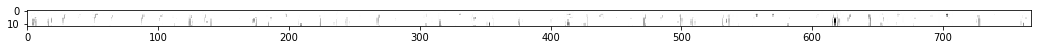

Displaying activation map 3


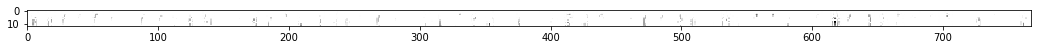

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


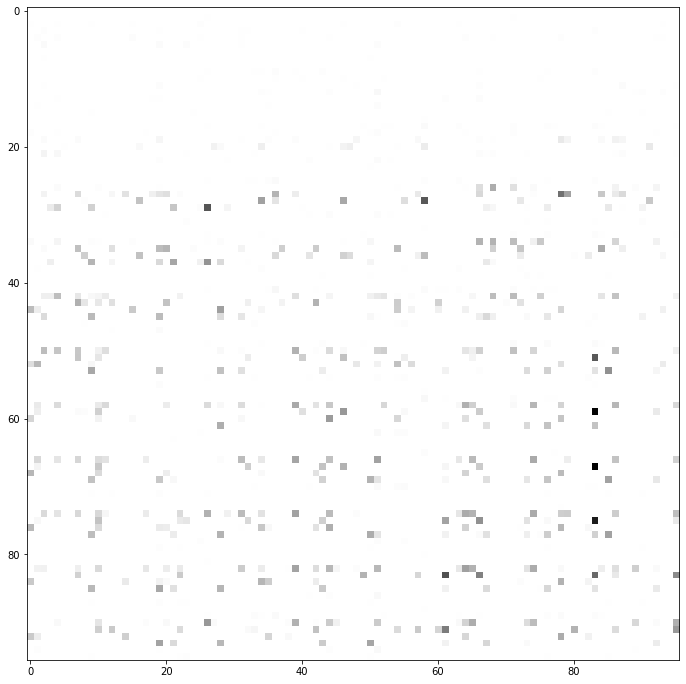

Displaying activation map 5
The activations for the layer is [1826.5973  2418.4407  1621.1437  1893.3466  2066.73    2408.2527
 2459.587   1711.5095  1521.0812  1852.2362  2177.7212  1384.1055
 2495.3389  1518.8599  1150.0206  1601.4315  1276.9458  1453.0497
 3266.546   1461.6753  1989.5625   949.33826 2747.6917  2955.8577
 2227.033  ]


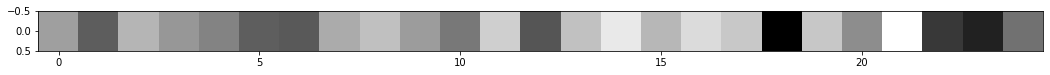

Displaying activation map 6
The activations for the layer is [2989.9216    0.     2800.4038 2717.0972 2891.051  3782.4666 3497.0735
    0.        0.        0.        0.     2274.858     0.        0.
 1474.5162    0.     2229.4365 2325.9385 4814.6494 1959.4823 3060.8362
    0.     4071.0586 4685.729  3271.1848]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


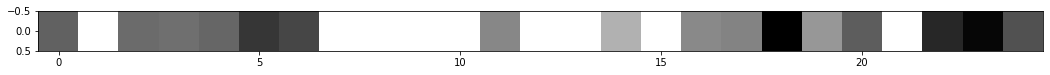

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


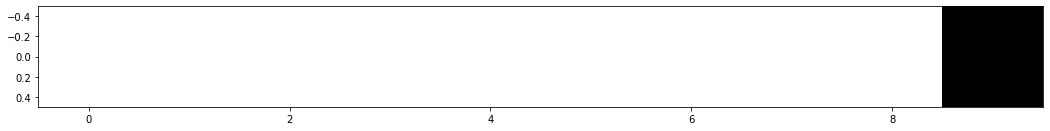

In [202]:
#cropping the image of 9

im_path = r'/gdrive/My Drive/datasetJPG/img_102.jpg'
img = cv2.imread(im_path)
dim=(28,28)
crop_img_9 = img[0:14, 0:28,0:1] # Crop from {x, y, w, h } => {0, 0, 300, 400}

crop_img_9=cv2.resize(crop_img_9,dim,interpolation=1)

cv2_imshow(crop_img_9)
cv2.waitKey(0)

#reshape and resize
crop_test_9array=np.array(crop_img_9,dtype='float')
print(crop_test_9array.shape)

crop_test_9img=crop_test_9array.reshape(28,28,1)
crop_test_9img.shape

test_image_crop_9 =np.expand_dims(crop_test_9img, axis=0)
test_image_crop_9.shape

print(model.predict_proba(test_image_crop_9,batch_size=1))
print(test_image_crop_9.shape)

activation_crop_img2=get_activations(model,test_image_crop_9)
display_activations(activation_crop_img2)

(28, 28)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


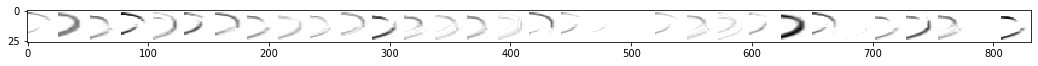

Displaying activation map 1


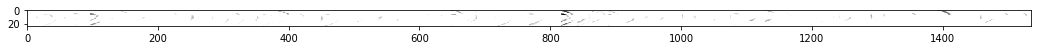

Displaying activation map 2


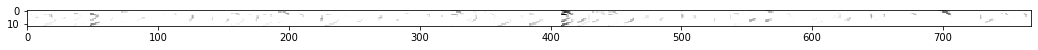

Displaying activation map 3


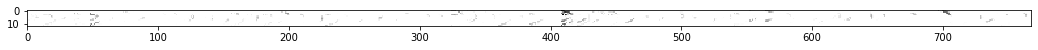

Displaying activation map 4
The activations for the layer is [2.8926845 0.        0.        ... 0.        0.        0.       ]


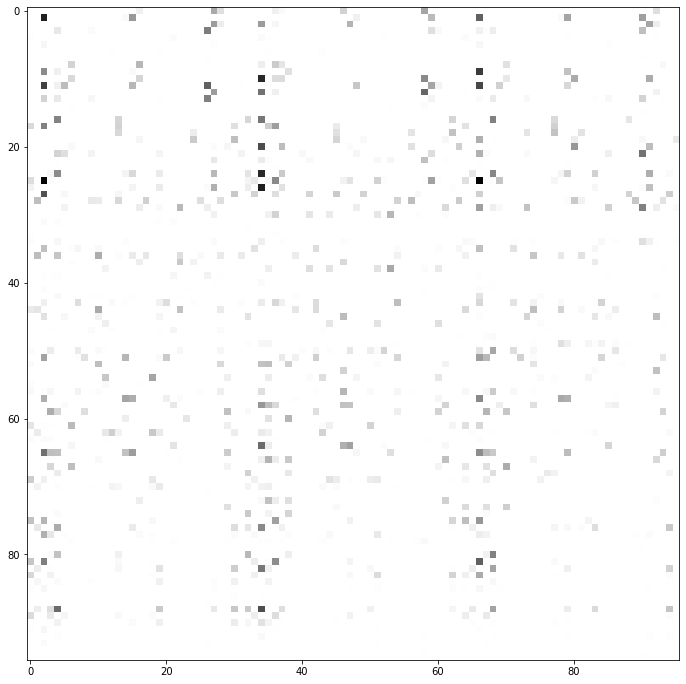

Displaying activation map 5
The activations for the layer is [2221.7683   838.19763 2430.6655  1426.5243  1457.8496   373.10608
  603.28534 1300.4623  1430.2913  1316.004   2639.0305  1169.5369
 2322.6145  1558.2445  1073.7963  1648.7762  2169.451   2324.6897
  536.00696 1769.1681  1660.62    1908.4497   345.91495  393.1546
 1273.9019 ]


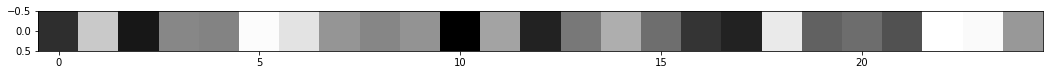

Displaying activation map 6
The activations for the layer is [3274.702      0.      3458.552   1886.3733     0.         0.
  830.2399  1889.8081  2465.6763  1807.4166  3931.2478  1750.293
 3713.602   2144.5332  1439.8925     0.      3100.6074  3129.6865
  399.08542    0.         0.      2787.9783     0.         0.
 2045.5751 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


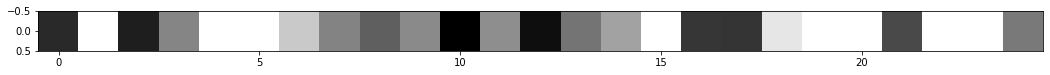

Displaying activation map 7
The activations for the layer is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


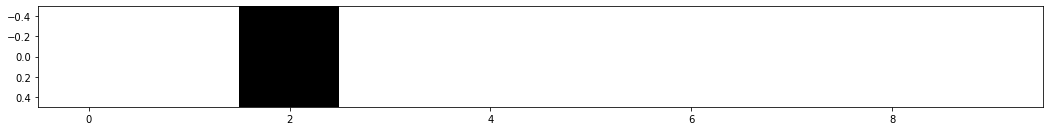

In [203]:
#cropping the right side of 0

im_path = r'/gdrive/My Drive/datasetJPG/img_109.jpg'
img = cv2.imread(im_path)
dim=(28,28)
crop_img_0 = img[0:28, 15:28,0:1] # Crop from {x, y, w, h } 

crop_img_0=cv2.resize(crop_img_0,dim,interpolation=1)

cv2_imshow(crop_img_0)
cv2.waitKey(0)

#reshape and resize
crop_test_0array=np.array(crop_img_0,dtype='float')
print(crop_test_0array.shape)

crop_test_0img=crop_test_0array.reshape(28,28,1)
crop_test_0img.shape

test_image_crop_0 =np.expand_dims(crop_test_0img, axis=0)
test_image_crop_0.shape

print(model.predict_proba(test_image_crop_0,batch_size=1))
print(test_image_crop_0.shape)

activation_crop_img3=get_activations(model,test_image_crop_0)
display_activations(activation_crop_img3)

In [0]:
def test_crop_image(path,x,y,w,h):
  img = cv2.imread(path)
  dim=(28,28)
  crop_img = img[x:y, w:h,0:1] # Crop from {x, y, w, h }

  crop_img=cv2.resize(crop_img,dim,interpolation=1)

  cv2_imshow(crop_img)

  #reshape and resize

  crop_test_array=np.array(crop_img,dtype='float')
  print(crop_test_array.shape)

  crop_test_img=crop_test_array.reshape(28,28,1)
  crop_test_img.shape

  test_image_crop =np.expand_dims(crop_test_img, axis=0)
  test_image_crop.shape

  print(model.predict_proba(test_image_crop,batch_size=1))
  print(test_image_crop.shape)

  activation_crop_img=get_activations(model,test_image_crop)
  display_activations(activation_crop_img)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


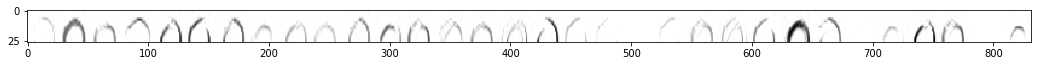

Displaying activation map 1


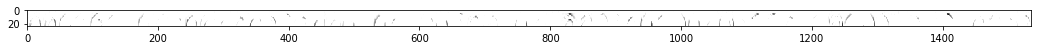

Displaying activation map 2


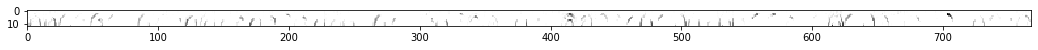

Displaying activation map 3


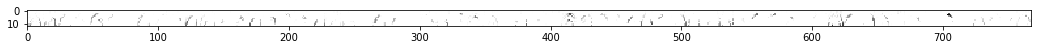

Displaying activation map 4
The activations for the layer is [4.5952473 0.        0.        ... 0.        0.        0.       ]


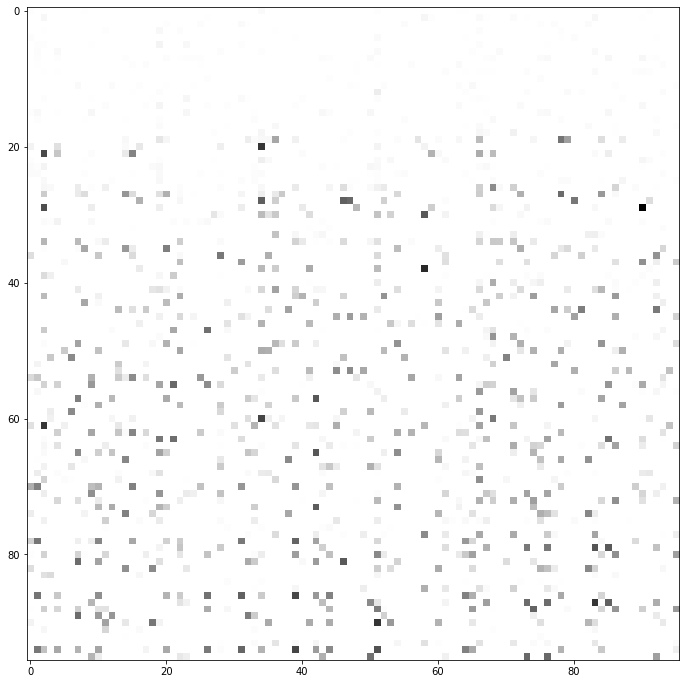

Displaying activation map 5
The activations for the layer is [ 597.2097  1736.9204  1549.8617  1652.2363  1836.8716  1411.6177
 1500.408   1093.5333  1071.7172  1868.2075  1571.7001   979.20276
 1653.7092   983.94653 1566.7205  1392.1189  1149.5684  1489.8418
 2087.0872  1440.4778  1781.4769  1132.0571  1649.5317  1855.3398
 1687.1562 ]


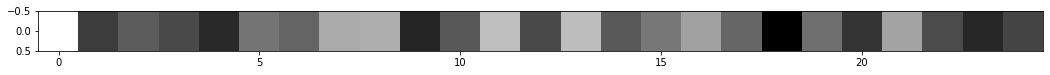

Displaying activation map 6
The activations for the layer is [ 870.6243 2982.5896 2459.7307 2453.3662 2576.645     0.     2533.6172
    0.     1578.6282 2570.9268    0.     1753.17   2445.1077 1607.2655
 2292.9268 1959.7867 1772.387  2344.1538 3021.4739 1981.7898    0.
 1604.5232 2560.3176 2967.6047 2486.812 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


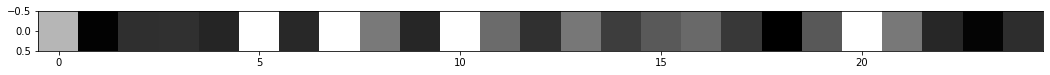

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


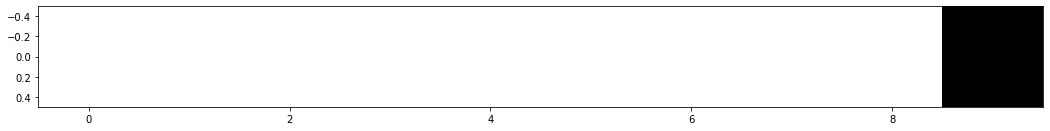

In [206]:
#cropping the lower half image 0

path=r'/gdrive/My Drive/datasetJPG/img_109.jpg'

test_crop_image(path,0,13,0,28)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


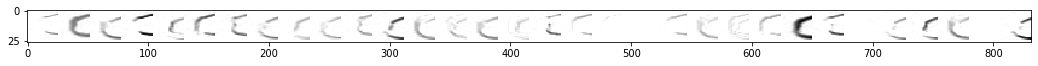

Displaying activation map 1


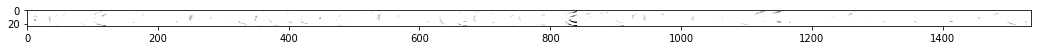

Displaying activation map 2


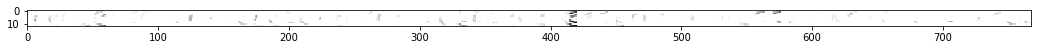

Displaying activation map 3


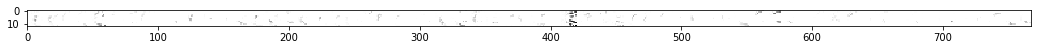

Displaying activation map 4
The activations for the layer is [8.223585 0.       0.       ... 0.       7.522483 0.      ]


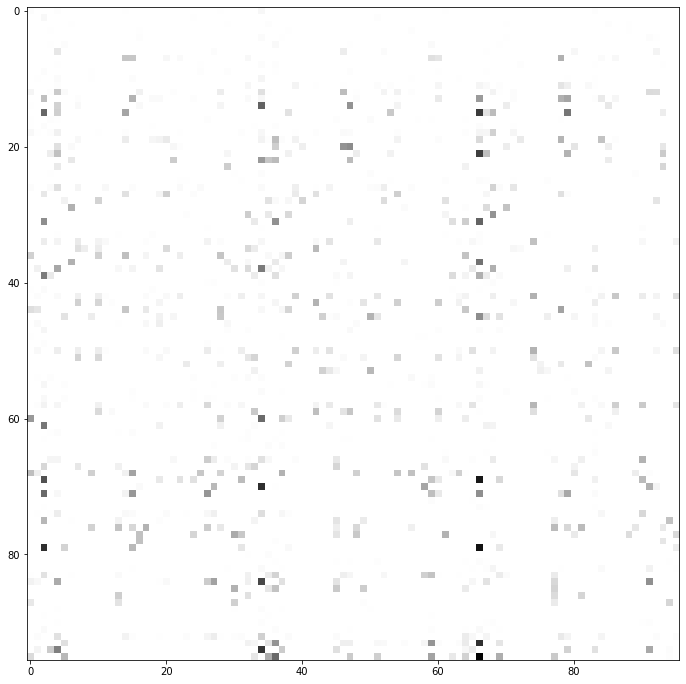

Displaying activation map 5
The activations for the layer is [1643.0326  1141.3345  2030.8071  2009.0377  2205.1887  1643.431
 1096.6985  2149.4004   616.1937   642.06885 1185.2292  1047.8279
 1361.81     357.11185 1638.3553     0.       845.1365  2362.7778
 2643.3232  1113.4147  2110.4546   528.2792  2074.3245  2769.4849
  652.0214 ]


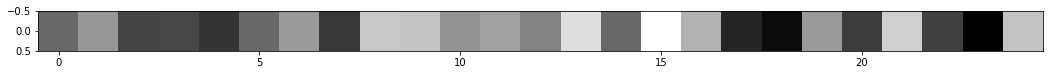

Displaying activation map 6
The activations for the layer is [2361.7258  1541.5552  3082.672      0.      3033.0066  2054.2896
 1777.5059     0.       840.0975  1043.7181  1746.5938     0.
 2089.2812   376.36035 2708.8865     0.         0.      3713.0989
    0.         0.      2863.6697     0.      3496.1172     0.
  845.7867 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


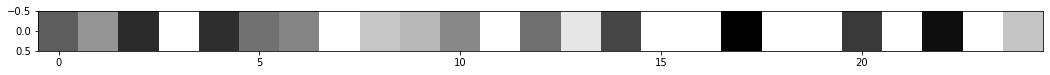

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


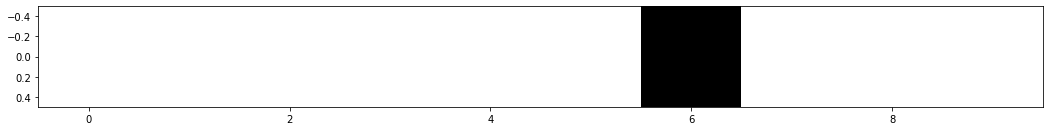

In [207]:
#cropping the right half image 0

path=r'/gdrive/My Drive/datasetJPG/img_109.jpg'

test_crop_image(path,0,28,0,13)

(28, 28)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


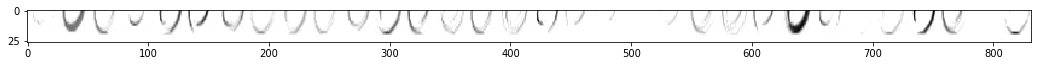

Displaying activation map 1


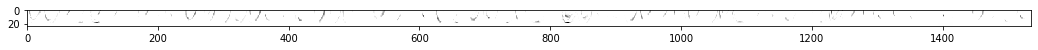

Displaying activation map 2


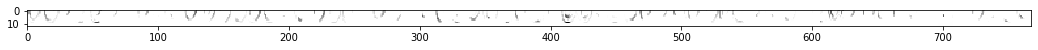

Displaying activation map 3


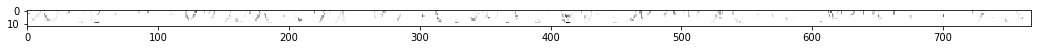

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


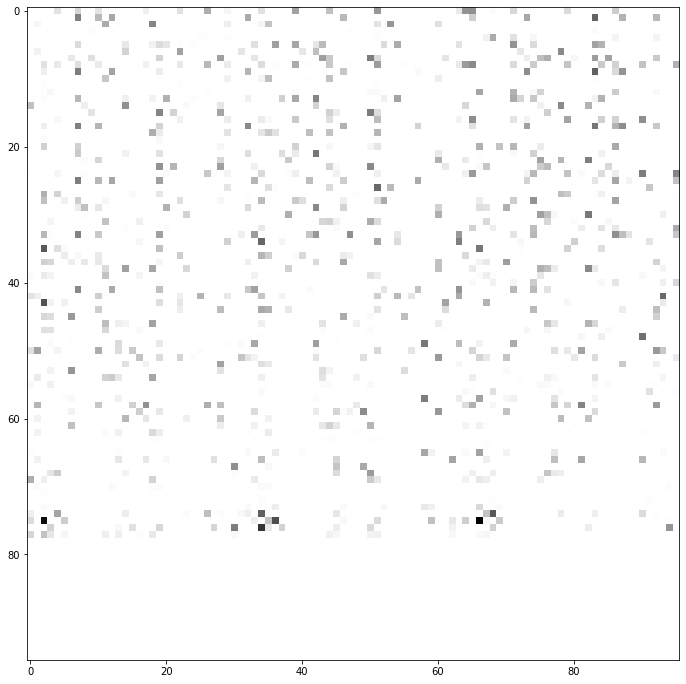

Displaying activation map 5
The activations for the layer is [ 250.53015 2964.8508  1912.108    688.12006  791.4565  2279.4421
 2410.783   2364.8987   551.0016  1173.6116   844.9032  1984.5988
    0.      1218.0332  1699.3353  1606.7047  1005.6181  1120.7955
 2264.0728  2602.128   1851.0469   776.15295 3161.582   2929.158
  945.8127 ]


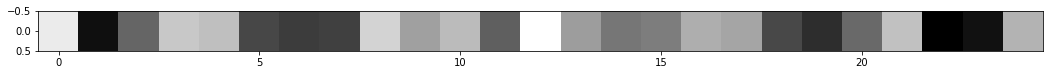

Displaying activation map 6
The activations for the layer is [   0.         0.      3117.9863  1021.86365    0.         0.
    0.      3627.9526   783.45734    0.      1329.6483  2869.9438
  135.78018    0.         0.         0.         0.      1862.8983
 3236.711   3890.5037     0.         0.      4693.0767  4200.978
 1375.8904 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


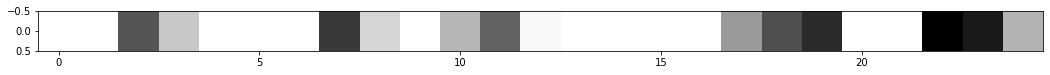

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


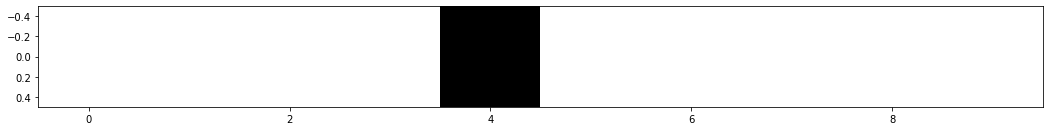

In [208]:
#cropping the lower half image 0

path=r'/gdrive/My Drive/datasetJPG/img_109.jpg'

test_crop_image(path,15,28,0,28)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


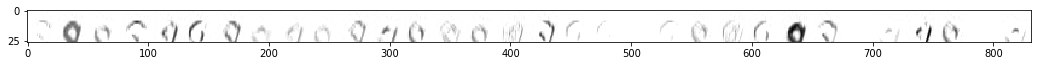

Displaying activation map 1


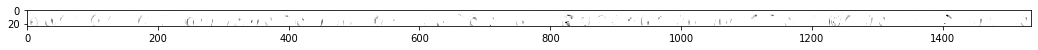

Displaying activation map 2


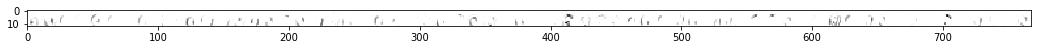

Displaying activation map 3


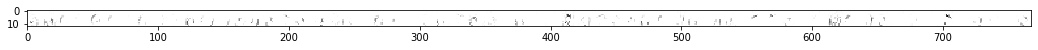

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


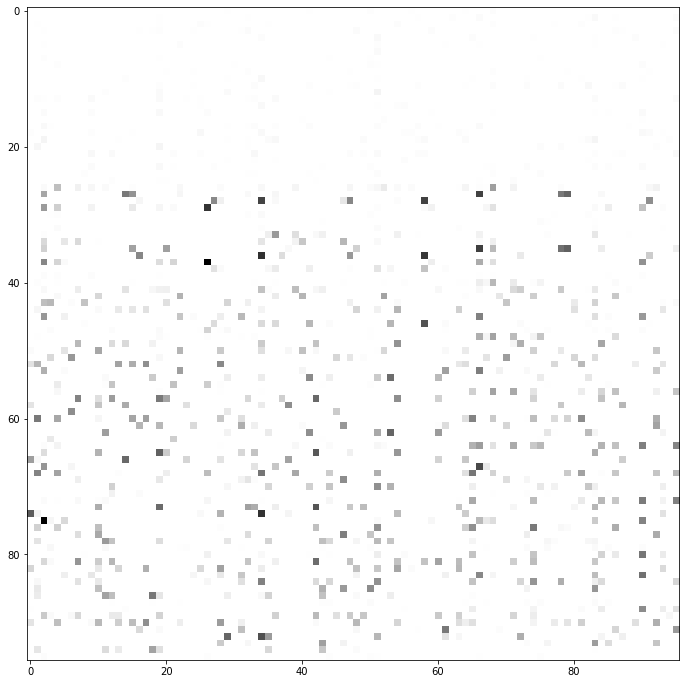

Displaying activation map 5
The activations for the layer is [ 959.5611  2323.798   2106.8948  1811.9557  1889.9918  1508.431
 2025.8033  1325.2897   539.81995 1880.295   2186.065    780.65717
 2152.1072  1246.9907  2047.7039  2070.52    1022.8567  2000.8046
 2592.9658  1681.1418  2078.0999  1085.4559  2650.226   2184.7402
 1395.9774 ]


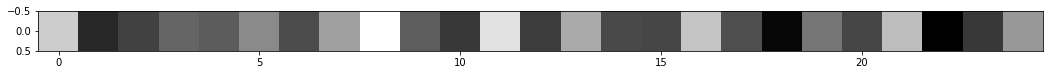

Displaying activation map 6
The activations for the layer is [   0.      3201.4387  3246.7913  2794.493   2846.2534     0.
 2969.435      0.       795.49084 2776.8062  3363.9907     0.
    0.      2076.4255     0.         0.         0.         0.
 4096.938   2305.3943  3132.783      0.      3902.7593  3434.0442
 2415.6995 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


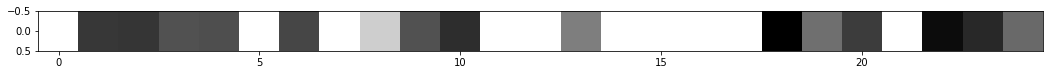

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


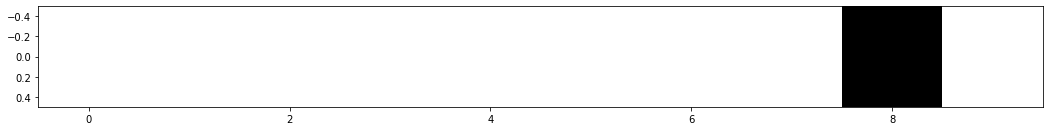

In [209]:
#cropping the lower half image 8

path=r'/gdrive/My Drive/datasetJPG/img_127.jpg'

test_crop_image(path,0,13,0,28)

(28, 28)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


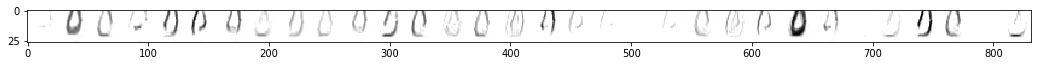

Displaying activation map 1


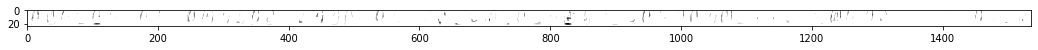

Displaying activation map 2


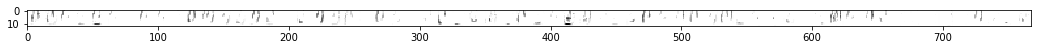

Displaying activation map 3


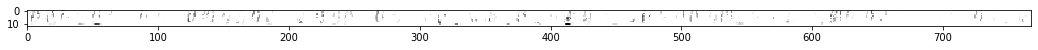

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


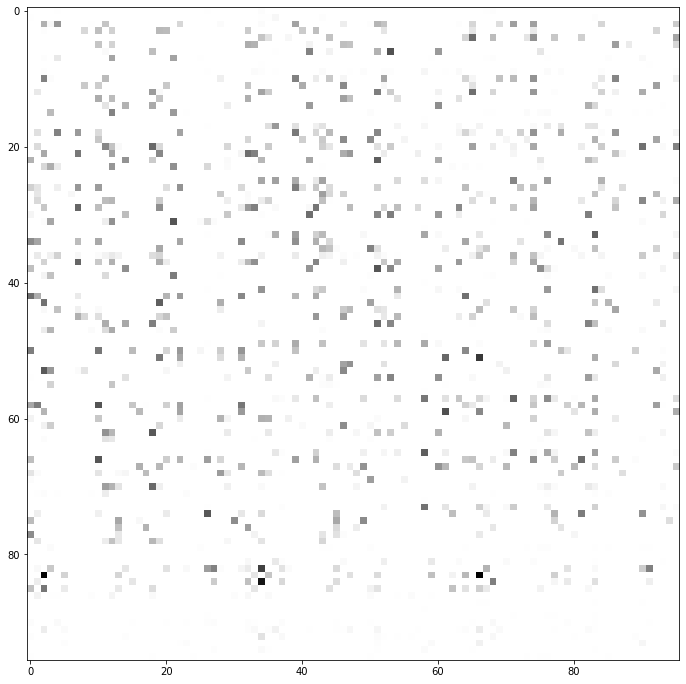

Displaying activation map 5
The activations for the layer is [ 812.61835  3118.6956   2241.7617   2980.4187   2891.9082   2592.8096
 2768.376    2511.605      17.297344 1830.2576   2119.045    1480.7618
 1634.8838   1136.6934   2920.9238   2033.3093    420.99173  2004.2699
 3165.157    2152.3108   2790.9766     25.090403 3692.4985   2746.2222
 1623.4004  ]


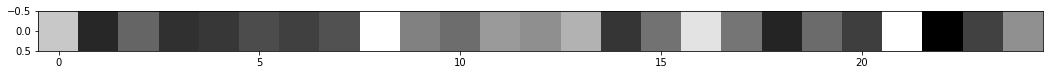

Displaying activation map 6
The activations for the layer is [   0.      4843.432      0.      4747.0347  4680.5273  4461.3506
 4183.105      0.       123.30454 2941.9924  3381.214      0.
 2631.0618     0.      4481.5864     0.         0.      3386.8247
 5352.222   3473.2854     0.       331.5286  5878.684      0.
 2614.3457 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


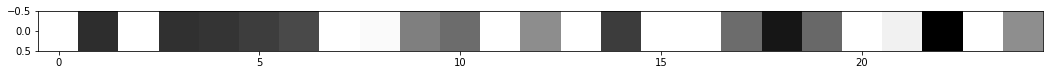

Displaying activation map 7
The activations for the layer is [0.000000e+00 0.000000e+00 1.730728e-15 0.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]


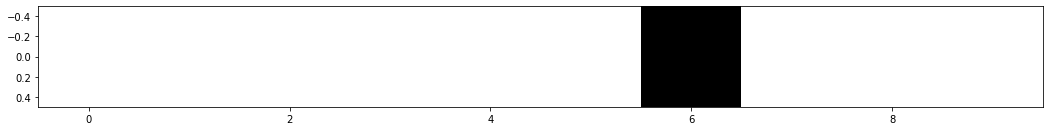

In [210]:
#cropping the upper half image 8

path=r'/gdrive/My Drive/datasetJPG/img_127.jpg'

test_crop_image(path,15,28,0,28)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


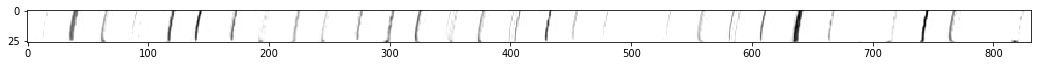

Displaying activation map 1


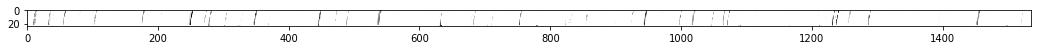

Displaying activation map 2


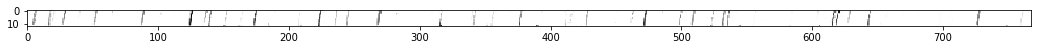

Displaying activation map 3


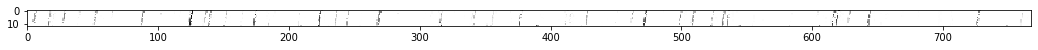

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


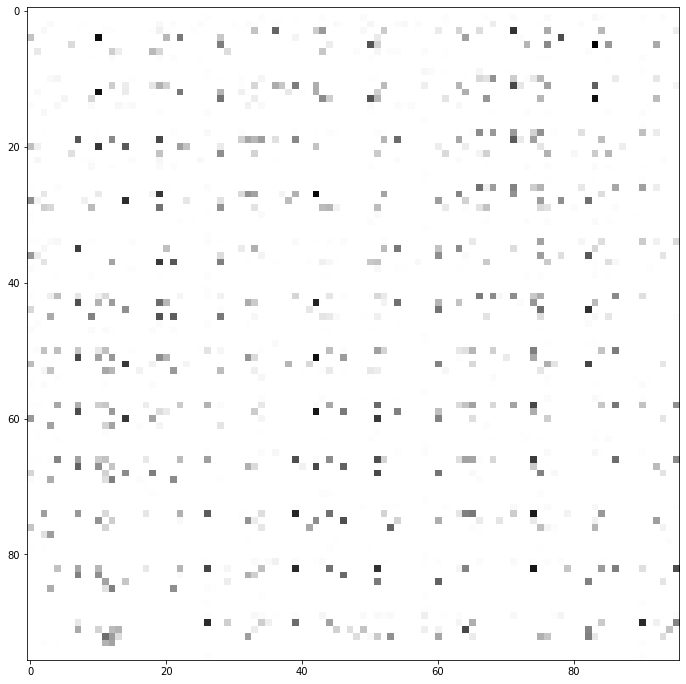

Displaying activation map 5
The activations for the layer is [3540.0803 2802.5542 3419.4678 1315.1442 1205.4924 3702.4956 2777.6216
 3779.0413 3354.4219 1977.2566 2101.2034 3507.7754 2075.844  1483.8248
 1304.6343 1526.7782 3375.2139 3135.9402 4377.8    1959.8695 2554.4827
 1168.7413 2939.556  4910.8657 2195.473 ]


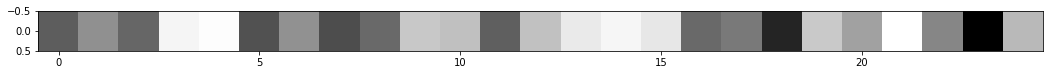

Displaying activation map 6
The activations for the layer is [5158.8447 4058.3809    0.     1860.8401 1578.7908 5208.0854    0.
    0.        0.     2819.6814 3180.1274    0.        0.     2520.8105
    0.     2408.1702 4993.8047 4557.1006 6529.904  2812.6487    0.
 1810.8516 4548.1807    0.     3171.9758]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


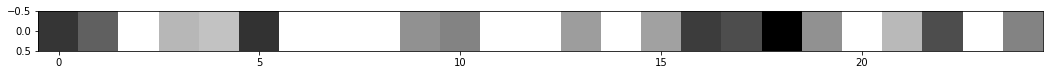

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


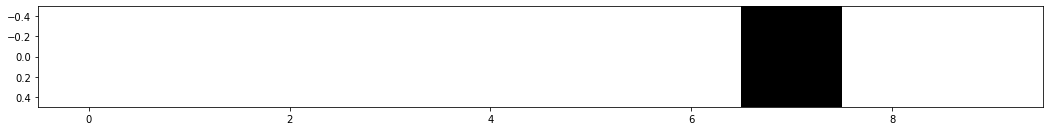

In [221]:
#cropping the upper half image 7

path=r'/gdrive/My Drive/datasetJPG/img_128.jpg'

test_crop_image(path,12,28,0,28)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


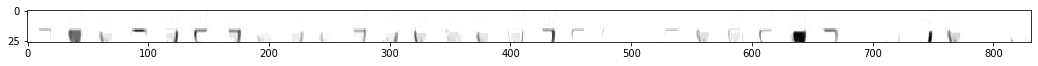

Displaying activation map 1


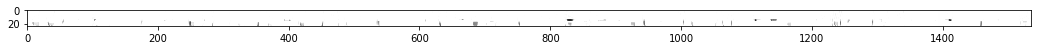

Displaying activation map 2


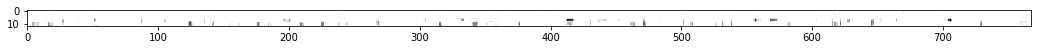

Displaying activation map 3


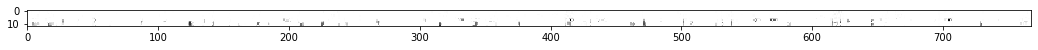

Displaying activation map 4
The activations for the layer is [0. 0. 0. ... 0. 0. 0.]


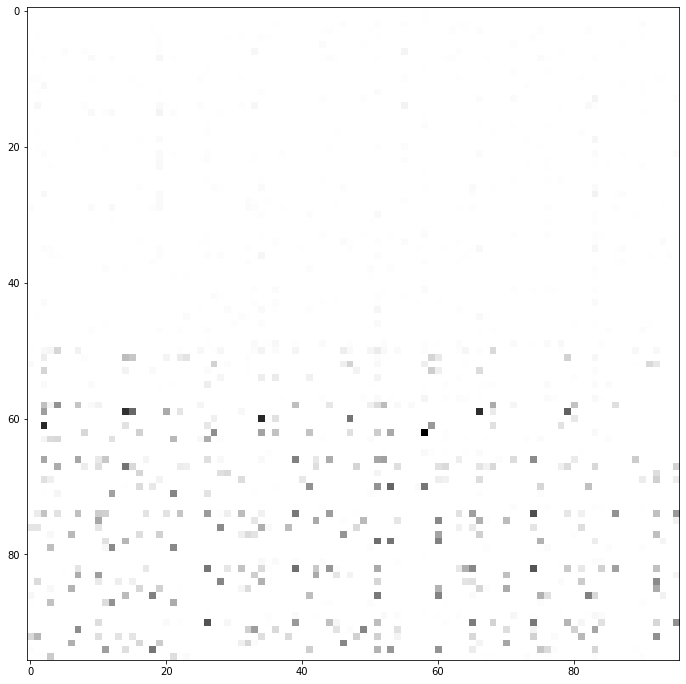

Displaying activation map 5
The activations for the layer is [1279.9023   680.2863  1085.6838   880.15173  916.23584  701.4526
  952.6097   639.96564  639.50616  736.6298  1129.6984   455.21375
 1462.3447   680.6025   307.66058  600.4805   813.984   1133.1223
 1137.1345   530.4885  1419.4843   505.5555  1491.7103  1374.0548
  955.85596]


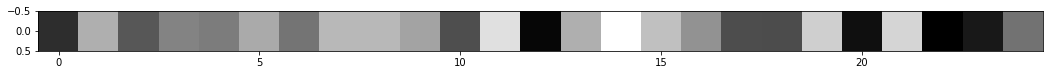

Displaying activation map 6
The activations for the layer is [2057.0276   891.1651  1918.1068     0.      1478.3247     0.
 1501.3729  1150.5356   698.42377 1016.5595  1615.0471   585.1647
 2402.6267  1030.7412   630.70306    0.      1431.5765  1886.695
 1779.0039     0.         0.       781.3136     0.      2247.8594
 1418.0643 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


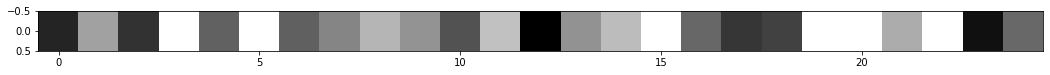

Displaying activation map 7
The activations for the layer is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


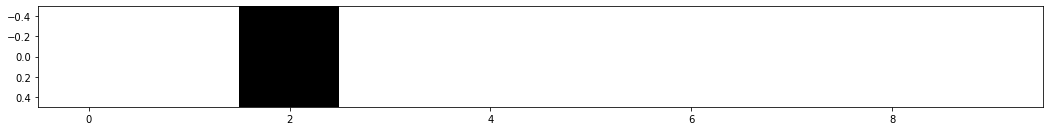

In [230]:
#cropping the image 7

path=r'/gdrive/My Drive/datasetJPG/img_128.jpg'

test_crop_image(path,0,11,0,28)

(28, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 28, 28, 1)
----- activations -----
(1, 26, 26, 32)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 25)
(1, 25)
(1, 10)
Displaying activation map 0


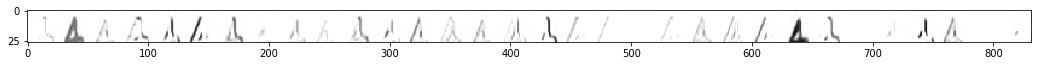

Displaying activation map 1


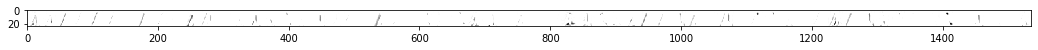

Displaying activation map 2


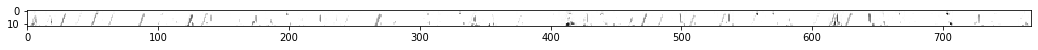

Displaying activation map 3


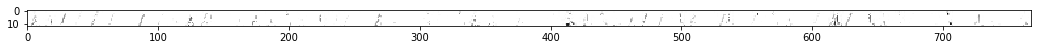

Displaying activation map 4
The activations for the layer is [0.       0.       0.       ... 8.761802 0.       0.      ]


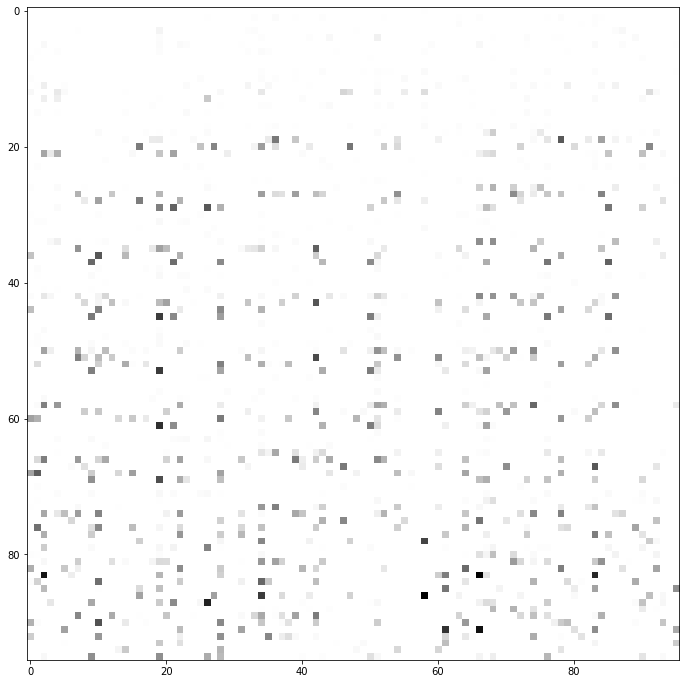

Displaying activation map 5
The activations for the layer is [3006.0334 2373.8281 3243.1975 2216.3767 2377.1047 2935.3147 2113.8306
 3347.0686 2185.6008 1451.5548 2584.8289 2219.6252 2565.955  1875.3297
 1307.1046 1360.1675 1879.6027 2852.1467 3096.5872 1694.5874 3249.1343
  941.614  2443.8313 3470.7578 2202.6865]


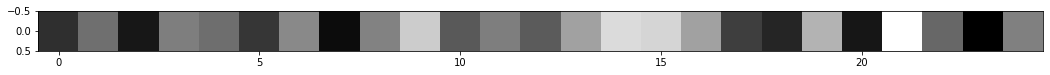

Displaying activation map 6
The activations for the layer is [4373.0723 3224.789  4435.1846    0.        0.     4524.1743 2914.227
 4905.356  3403.4912 2501.785  3477.2097 3170.3313    0.     2654.3235
 1846.4285 1852.5142 2694.9517    0.     4773.797  2339.8223 4540.923
    0.     3248.2212    0.     3257.9207]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


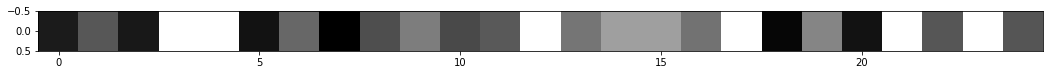

Displaying activation map 7
The activations for the layer is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


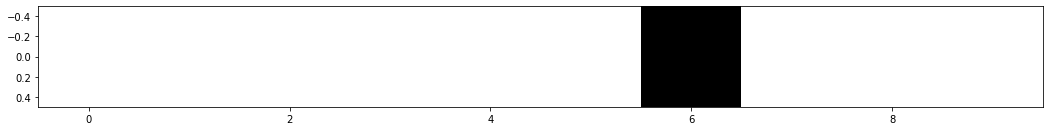

In [233]:
#cropping the image 4

path=r'/gdrive/My Drive/datasetJPG/img_113.jpg'

test_crop_image(path,0,18,0,28)